In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import signac
import freud
from scipy.stats import uniform
from sklearn.kernel_ridge import KernelRidge


from scipy.optimize import curve_fit, minimize
from sklearn.kernel_ridge import KernelRidge
from joblib import dump, load

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import *
from time import time
from scipy.spatial.transform import Rotation as R
from scipy.special import factorial, hermite


import matplotlib.pylab as pl

from PIL import Image







1500 1500
9000000
0.33333337


(-1.0, 10.0)

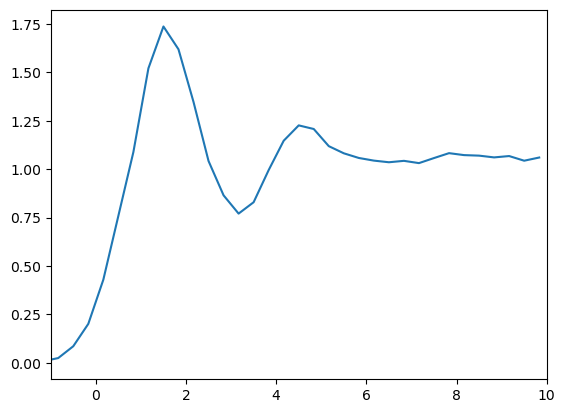

In [2]:
slab = plt.imread('slab.png')
q4spectra = np.load("../spce_interface/q4spectra.npy")
q4T = np.load("../spce_interface/q4T.npy")
q4points = np.load("../spce_interface/q4points.npy")

q3spectra = np.load("../spce_interface/q3spectra.npy")
q3T = np.load("../spce_interface/q3T.npy")
q3points = np.load("../spce_interface/q3points.npy")
print(len(slab), len(slab[0]))
print(slab.size)
slab = slab[422:1080, 150:]


iidis = np.load("../spce_interface/oil4Odis.npy", allow_pickle=True)
boxW = 55.21996533**2
un, co = np.unique(np.round(np.concatenate(iidis), 1), return_counts=True)


coco, bins = np.histogram(np.concatenate(iidis), range = (-2, 10.0), bins = 36)
binw = bins[1] - bins[0]
unco = bins[:-1] + binw/2
print(binw)

plt.plot(unco, coco/boxW/binw/len(iidis)/(1/18.02 * 6.022 * 10**23 / 10**24))
plt.xlim(-1, 10)


Text(0, 0.5, '$\\bar{q}_3}$')

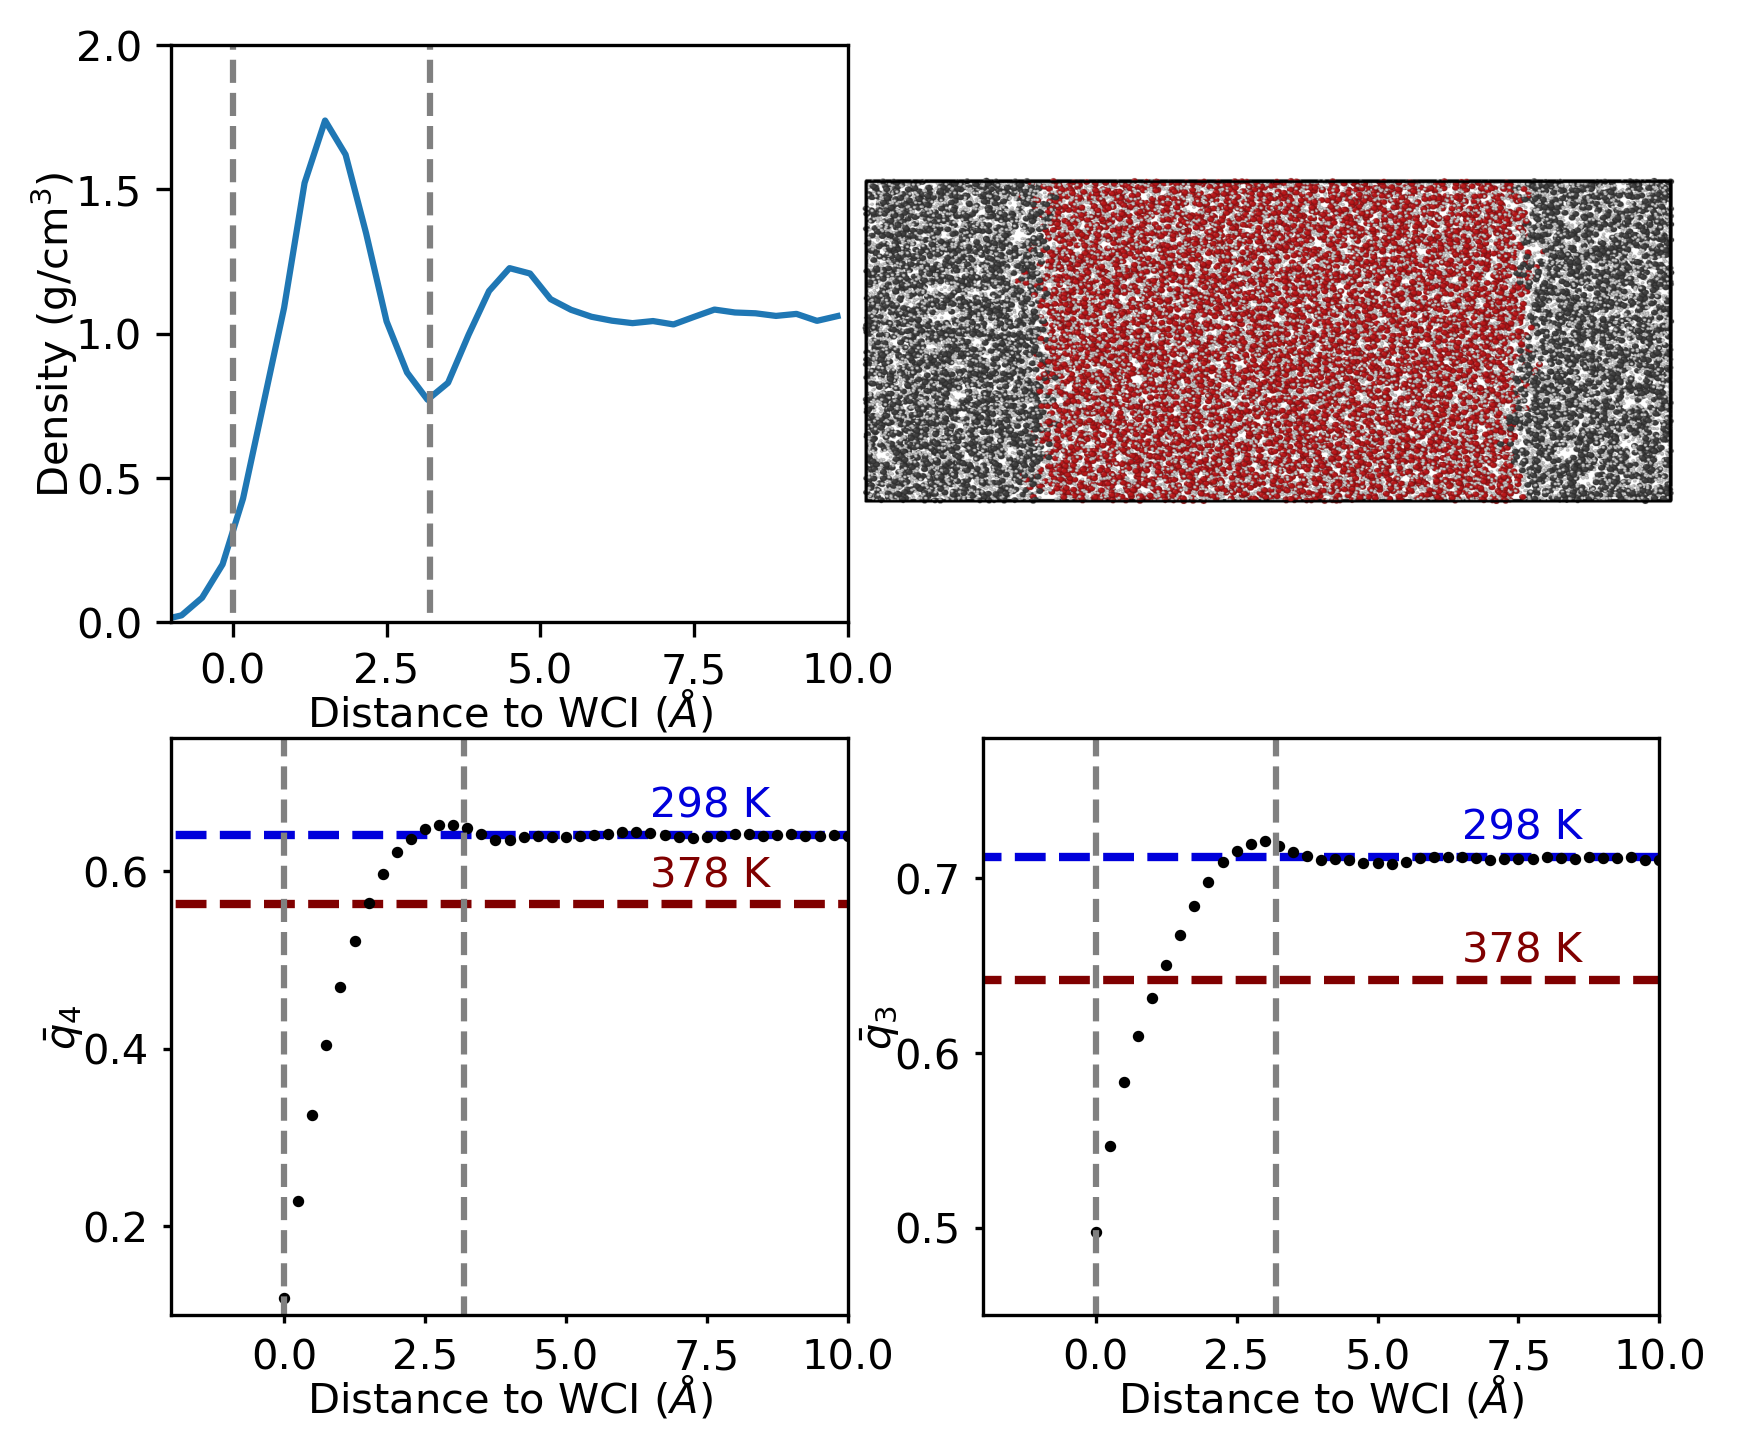

In [4]:
fs = 10

fig, axs = plt.subplots(2, 2, figsize=[6.4, 5.5], dpi=300)

labels2 = ['278.15 K', '298 K', '318 K', '338.15 K', '358.15 K', '378 K']
colors = pl.cm.seismic(np.linspace(0,1,6))


axs[0,0].plot(unco, 
                 coco/boxW/binw/len(iidis)/(1/18.02 * 6.022 * 10**23 / 10**24), 
                 #linewdith=lw,
                 zorder=1)

#axs[0,0].plot([0, 0], [-1, 2])
axs[0,0].plot([0]*2, [-1, 2], c='grey', linestyle='dashed')
axs[0,0].plot([3.2]*2, [-1, 2], c='grey', linestyle='dashed')




gs = axs[0, 0].get_gridspec()
for ax in axs[0, 1:]:
    ax.axis('off')
    
newax = fig.add_axes([0.48, 0.4, 0.45, 0.6])
newax.axis('off')
newax.imshow(slab, extent = (0, 5, 0, 2), zorder=2)



    

axs[1,0].scatter(q4points[:,0], q4points[:,1], s=3, c='black', zorder=1)
axs[1,0].plot([0.0]*2, [-1, 2], c='grey', linestyle='dashed')
axs[1,0].plot([3.2]*2, [-1, 2], c='grey', linestyle='dashed')




for i in [1,  5]:
    axs[1,0].text(6.5, q4T[i] + 0.02, labels2[i], fontsize=fs, color = colors[i])
    axs[1,0].plot([-35, 30], [q4T[i], q4T[i]], color = colors[i], linestyle='dashed', linewidth=2,  zorder=-1)
    #if i == 1:
    #    axs[2,0].text(-3.4, q4T[i] + 0.002, 'Bulk,', fontsize=fs, color = colors[i])
        
        
axs[1,1].scatter(q3points[:,0], q3points[:,1], s=3, c='black', zorder=1)
axs[1,1].plot([3.2]*2, [-1, 2], c='grey', linestyle='dashed')
axs[1,1].plot([0]*2, [-1, 2], c='grey', linestyle='dashed')




for i in [1, 5]:
    axs[1,1].text(6.5, q3T[i] + 0.01, labels2[i], fontsize=fs, color = colors[i])
    axs[1,1].plot([-35, 30], [q3T[i], q3T[i]], color = colors[i], linestyle='dashed', linewidth=2, zorder=-1)
    #if i == 1:
    #    axs[2,1].text(-3.4, q3T[i] + 0.002, 'Bulk,', fontsize=fs, color = colors[i])
        

        
        
xlabels = [['Distance to WCI ($\AA$)']*2]

ylabels = [['$\\bar{q}_4}$','$\\bar{q}_3}$']]


xlims =    [[[-2, 10], [-2, 10]]]

ylims =    [[[0.1, 0.75], [0.45, 0.78]]]

axs[0,0].set_xlabel("Distance to WCI ($\AA$)", fontsize=fs, labelpad = -1)
axs[0,0].set_ylabel("Density (g/cm$^3$)", fontsize=fs, labelpad = -1)
axs[0,0].set_xlim(-1, 10)
axs[0,0].set_ylim(0, 2.0)


for i in range(1, 2):
    for j in range(2):
        axs[i,j].set_xlabel(xlabels[i-1][j], fontsize=fs, labelpad = -1)
        axs[i,j].set_ylabel(ylabels[i-1][j], fontsize=fs, labelpad = -1)
        axs[i,j].set_xlim(xlims[i-1][j][0], xlims[i-1][j][1])
        axs[i,j].set_ylim(ylims[i-1][j][0], ylims[i-1][j][1])
        axs[i,j].tick_params(size=2, labelsize=fs)
        
axs[1,1].set_yticks([0.5, 0.6, 0.7], size=2, labelsize=fs)
axs[1,1].set_ylabel(ylabels[i-1][j], fontsize=fs, labelpad = -2)

#newax.text(0.07, 0.8, 'a)', transform=newax.transAxes)
#axs[0,0].text(-0.1, 1.04, 'a', transform=axs[0,0].transAxes, weight="bold")
#axs[0,1].text(-0.15, 0.83, 'b', transform=axs[0,1].transAxes, zorder=1, weight="bold")
#axs[1,0].text(-0.1, 1.04, 'c', transform=axs[1,0].transAxes, zorder=1, weight="bold")
#axs[1,1].text(-0.1, 1.04, 'd', transform=axs[1,1].transAxes, weight="bold")




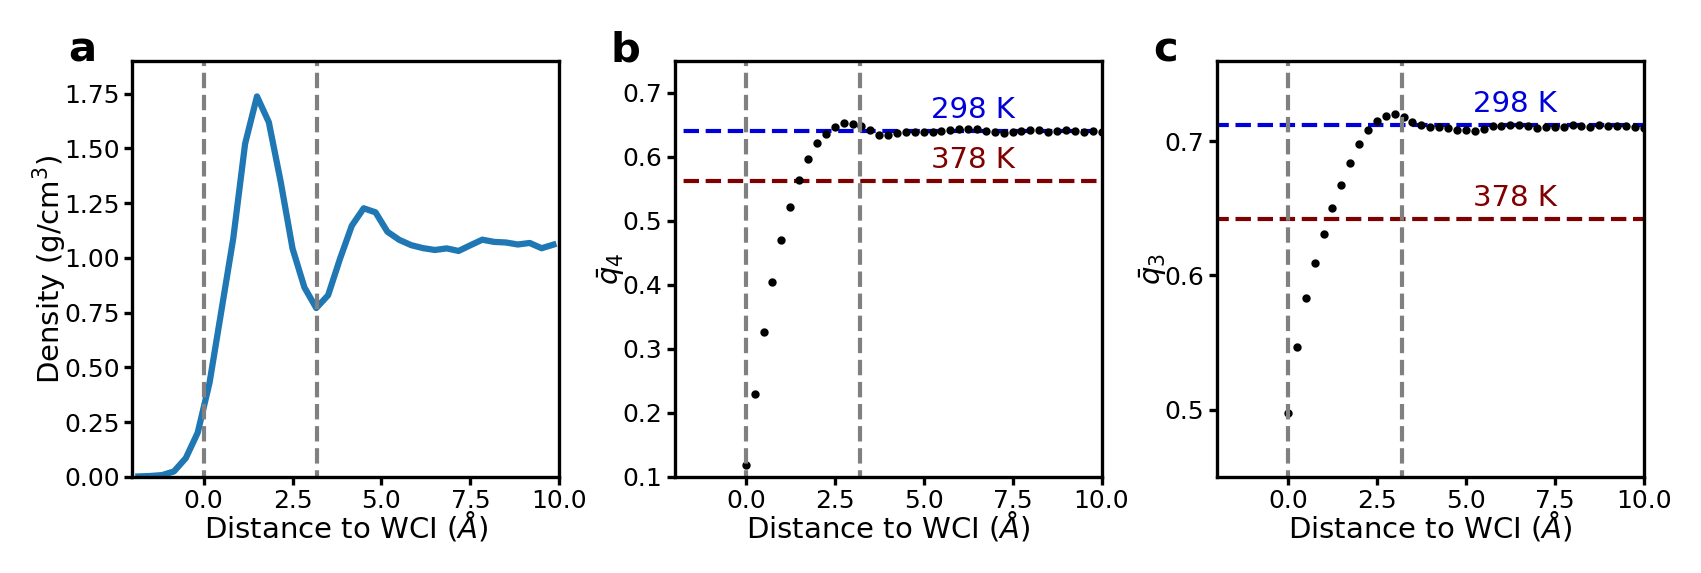

In [5]:
fs = 8
lw = 1.0
fig, axs = plt.subplots(1, 3, figsize=[6.5, 1.8], dpi=300)

labels2 = ['278 K', '298 K', '318 K', '338.15 K', '358 K', '378 K']
colors = pl.cm.seismic(np.linspace(0,1,6))


density = coco/boxW/binw/len(iidis)/(1/18.02 * 6.022 * 10**23 / 10**24)
axs[0].plot(unco, 
                 density, 
                 #linewdith=lw,
                 zorder=1)

np.savetxt("fig3a.csv", np.array([unco, density]).T, delimiter=",")


axs[0].plot([0]*2, [-1, 2], c='grey', linestyle='dashed', linewidth=1.0)
axs[0].plot([3.2]*2, [-1, 2], c='grey', linestyle='dashed', linewidth=1.0)


    

axs[1].scatter(q4points[:,0], q4points[:,1], s=1, c='black', zorder=1)
axs[1].plot([0.0]*2, [-1, 2], c='grey', linestyle='dashed', linewidth=1.0)
axs[1].plot([3.2]*2, [-1, 2], c='grey', linestyle='dashed', linewidth=1.0)

np.savetxt("fig3b.csv", q4points[:,:2], delimiter=",")



for i in [1,  5]:
    axs[1].text(5.2, q4T[i] + 0.02, labels2[i], fontsize=fs-1, color = colors[i])
    axs[1].plot([-35, 30], [q4T[i], q4T[i]], color = colors[i], linestyle='dashed', linewidth=1,  zorder=-1)

        
        
axs[2].scatter(q3points[:,0], q3points[:,1], s=1, c='black', zorder=1)
axs[2].plot([3.2]*2, [-1, 2], c='grey', linestyle='dashed', linewidth=1.0)
axs[2].plot([0]*2, [-1, 2], c='grey', linestyle='dashed', linewidth=1.0)

np.savetxt("fig3c.csv", q3points[:,:2], delimiter=",")



for i in [1, 5]:
    axs[2].text(5.2, q3T[i] + 0.01, labels2[i], fontsize=fs-1, color = colors[i])
    axs[2].plot([-35, 30], [q3T[i], q3T[i]], color = colors[i], linestyle='dashed', linewidth=1, zorder=-1)

        

        
        
xlabels = ['Distance to WCI ($\AA$)']*3

ylabels = ["Density (g/cm$^3$)", '$\\bar{q}_4}$','$\\bar{q}_3}$']


xlims =    [[-2, 10]]*3

ylims =    [[0.0, 1.9], [0.1, 0.75], [0.45, 0.76]]


for i in range(3):
    axs[i].set_xlabel(xlabels[i], fontsize=fs-1, labelpad = -1)
    axs[i].set_ylabel(ylabels[i], fontsize=fs-1, labelpad = -1)
    axs[i].set_xlim(xlims[i][0], xlims[i][1])
    axs[i].set_ylim(ylims[i][0], ylims[i][1])
    axs[i].tick_params(size=2, labelsize=fs-2, pad=1)

        
axs[2].set_yticks([0.5, 0.6, 0.7], size=2)

axs[0].text(-0.15, 1.0, 'a', transform=axs[0].transAxes, weight="bold")
axs[1].text(-0.15, 1.0, 'b', transform=axs[1].transAxes, zorder=1, weight="bold")
axs[2].text(-0.15, 1.0, 'c', transform=axs[2].transAxes, zorder=1, weight="bold")

plt.subplots_adjust(#left=0.1,
                    #bottom=0.0, 
                    #right=0.4, 
                    #top=0.0, 
                    wspace=0.27, 
                    hspace=0.0)

plt.savefig("Fig3.pdf", transparent=True)






0.33333337


(-1.0, 10.0)

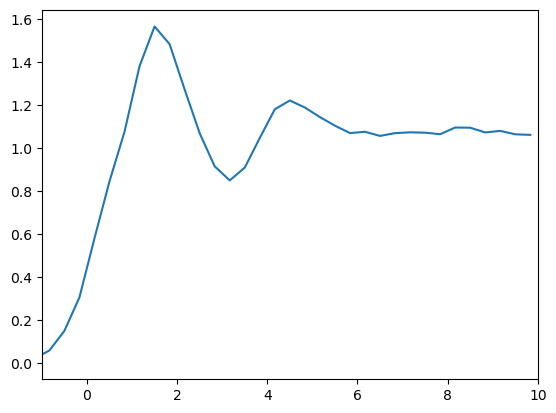

In [6]:
q4T = np.load("../amoeba_interface/aq4s.npy")
q4points = np.load("../amoeba_interface/amoebaq4s.npy")

q3T = np.load("../amoeba_interface/aq3s.npy")
q3points = np.load("../amoeba_interface/amoebaq3s.npy")


iidis = np.load("../amoeba_interface/Odisses.npy", allow_pickle=True)

amoeba_interface_fields = np.load("amoeba_interface_fields.npy",
                           allow_pickle=True)

amoeba_interface_fields[[1, 2, 3]] = amoeba_interface_fields[[3, 1, 2]]


boxW = 36**2
un, co = np.unique(np.round(np.concatenate(iidis), 1), return_counts=True)


coco, bins = np.histogram(np.concatenate(iidis), range = (-2, 10.0), bins = 36)
binw = bins[1] - bins[0]
unco = bins[:-1] + binw/2
print(binw)

plt.plot(unco, coco/boxW/binw/len(iidis)/(1/18.02 * 6.022 * 10**23 / 10**24))
plt.xlim(-1, 10)



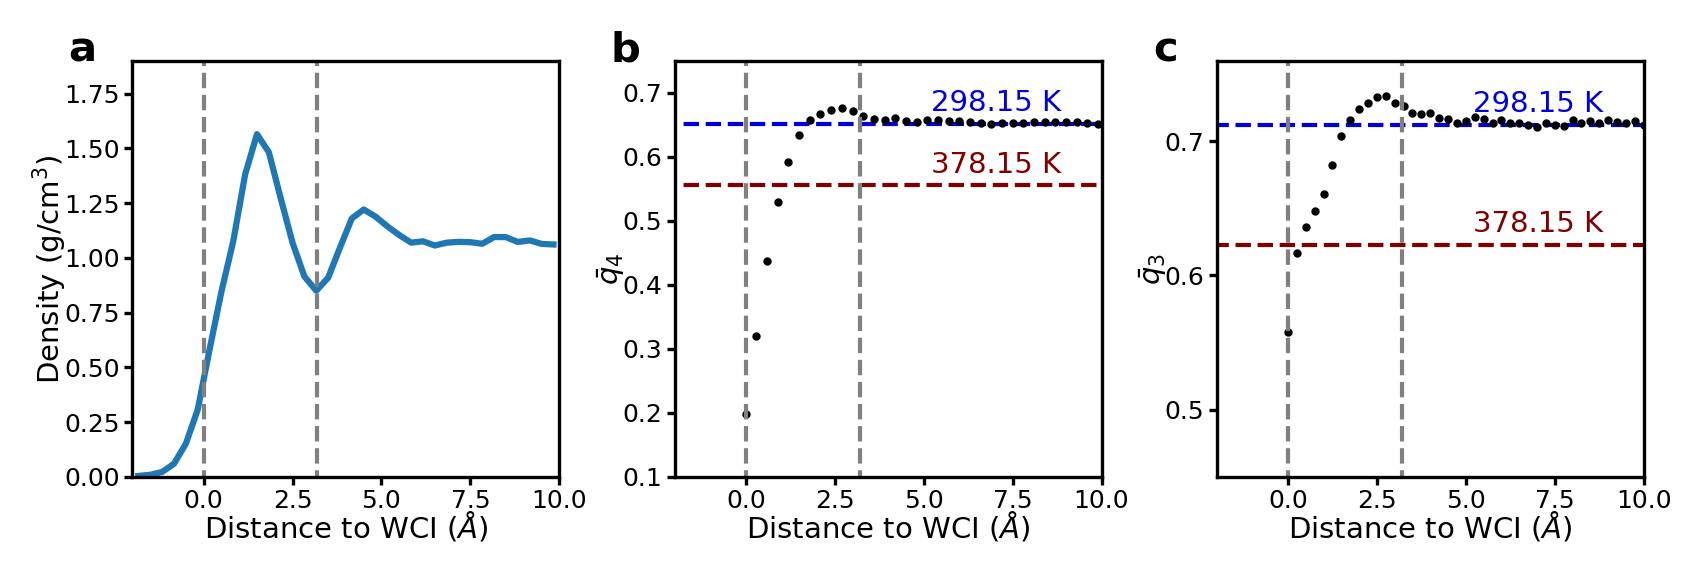

In [7]:
fs = 8
lw = 1.0
fig, axs = plt.subplots(1, 3, figsize=[6.5, 1.8], dpi=300)

labels2 = ['298.15 K', '378.15 K']
colors = pl.cm.seismic(np.linspace(0.2,1,2))


axs[0].plot(unco, 
                 coco/boxW/binw/len(iidis)/(1/18.02 * 6.022 * 10**23 / 10**24), 
                 #linewdith=lw,
                 zorder=1)

axs[0].plot([0]*2, [-1, 2], c='grey', linestyle='dashed', linewidth=1.0)
axs[0].plot([3.2]*2, [-1, 2], c='grey', linestyle='dashed', linewidth=1.0)


    

axs[1].scatter(q4points[:,0], q4points[:,1], s=1, c='black', zorder=1)
axs[1].plot([0.0]*2, [-1, 2], c='grey', linestyle='dashed', linewidth=1.0)
axs[1].plot([3.2]*2, [-1, 2], c='grey', linestyle='dashed', linewidth=1.0)




for i in [0, 1]:
    axs[1].text(5.2, q4T[i] + 0.02, labels2[i], fontsize=fs-1, color = colors[i])
    axs[1].plot([-35, 30], [q4T[i], q4T[i]], color = colors[i], linestyle='dashed', linewidth=1,  zorder=-1)

        
        
axs[2].scatter(q3points[:,0], q3points[:,1], s=1, c='black', zorder=1)
axs[2].plot([3.2]*2, [-1, 2], c='grey', linestyle='dashed', linewidth=1.0)
axs[2].plot([0]*2, [-1, 2], c='grey', linestyle='dashed', linewidth=1.0)



for i in [0, 1]:
    axs[2].text(5.2, q3T[i] + 0.01, labels2[i], fontsize=fs-1, color = colors[i])
    axs[2].plot([-35, 30], [q3T[i], q3T[i]], color = colors[i], linestyle='dashed', linewidth=1, zorder=-1)

        

        
        
xlabels = ['Distance to WCI ($\AA$)']*3

ylabels = ["Density (g/cm$^3$)", '$\\bar{q}_4}$','$\\bar{q}_3}$']


xlims =    [[-2, 10]]*3

ylims =    [[0.0, 1.9], [0.1, 0.75], [0.45, 0.76]]


for i in range(3):
    axs[i].set_xlabel(xlabels[i], fontsize=fs-1, labelpad = -1)
    axs[i].set_ylabel(ylabels[i], fontsize=fs-1, labelpad = -1)
    axs[i].set_xlim(xlims[i][0], xlims[i][1])
    axs[i].set_ylim(ylims[i][0], ylims[i][1])
    axs[i].tick_params(size=2, labelsize=fs-2, pad=1)

        
axs[2].set_yticks([0.5, 0.6, 0.7], size=2)

axs[0].text(-0.15, 1.0, 'a', transform=axs[0].transAxes, weight="bold")
axs[1].text(-0.15, 1.0, 'b', transform=axs[1].transAxes, zorder=1, weight="bold")
axs[2].text(-0.15, 1.0, 'c', transform=axs[2].transAxes, zorder=1, weight="bold")

plt.subplots_adjust(#left=0.1,
                    #bottom=0.0, 
                    #right=0.4, 
                    #top=0.0, 
                    wspace=0.27, 
                    hspace=0.0)

#plt.savefig("Fig3.pdf", transparent=True)



Text(-0.15, 1.0, 'd')

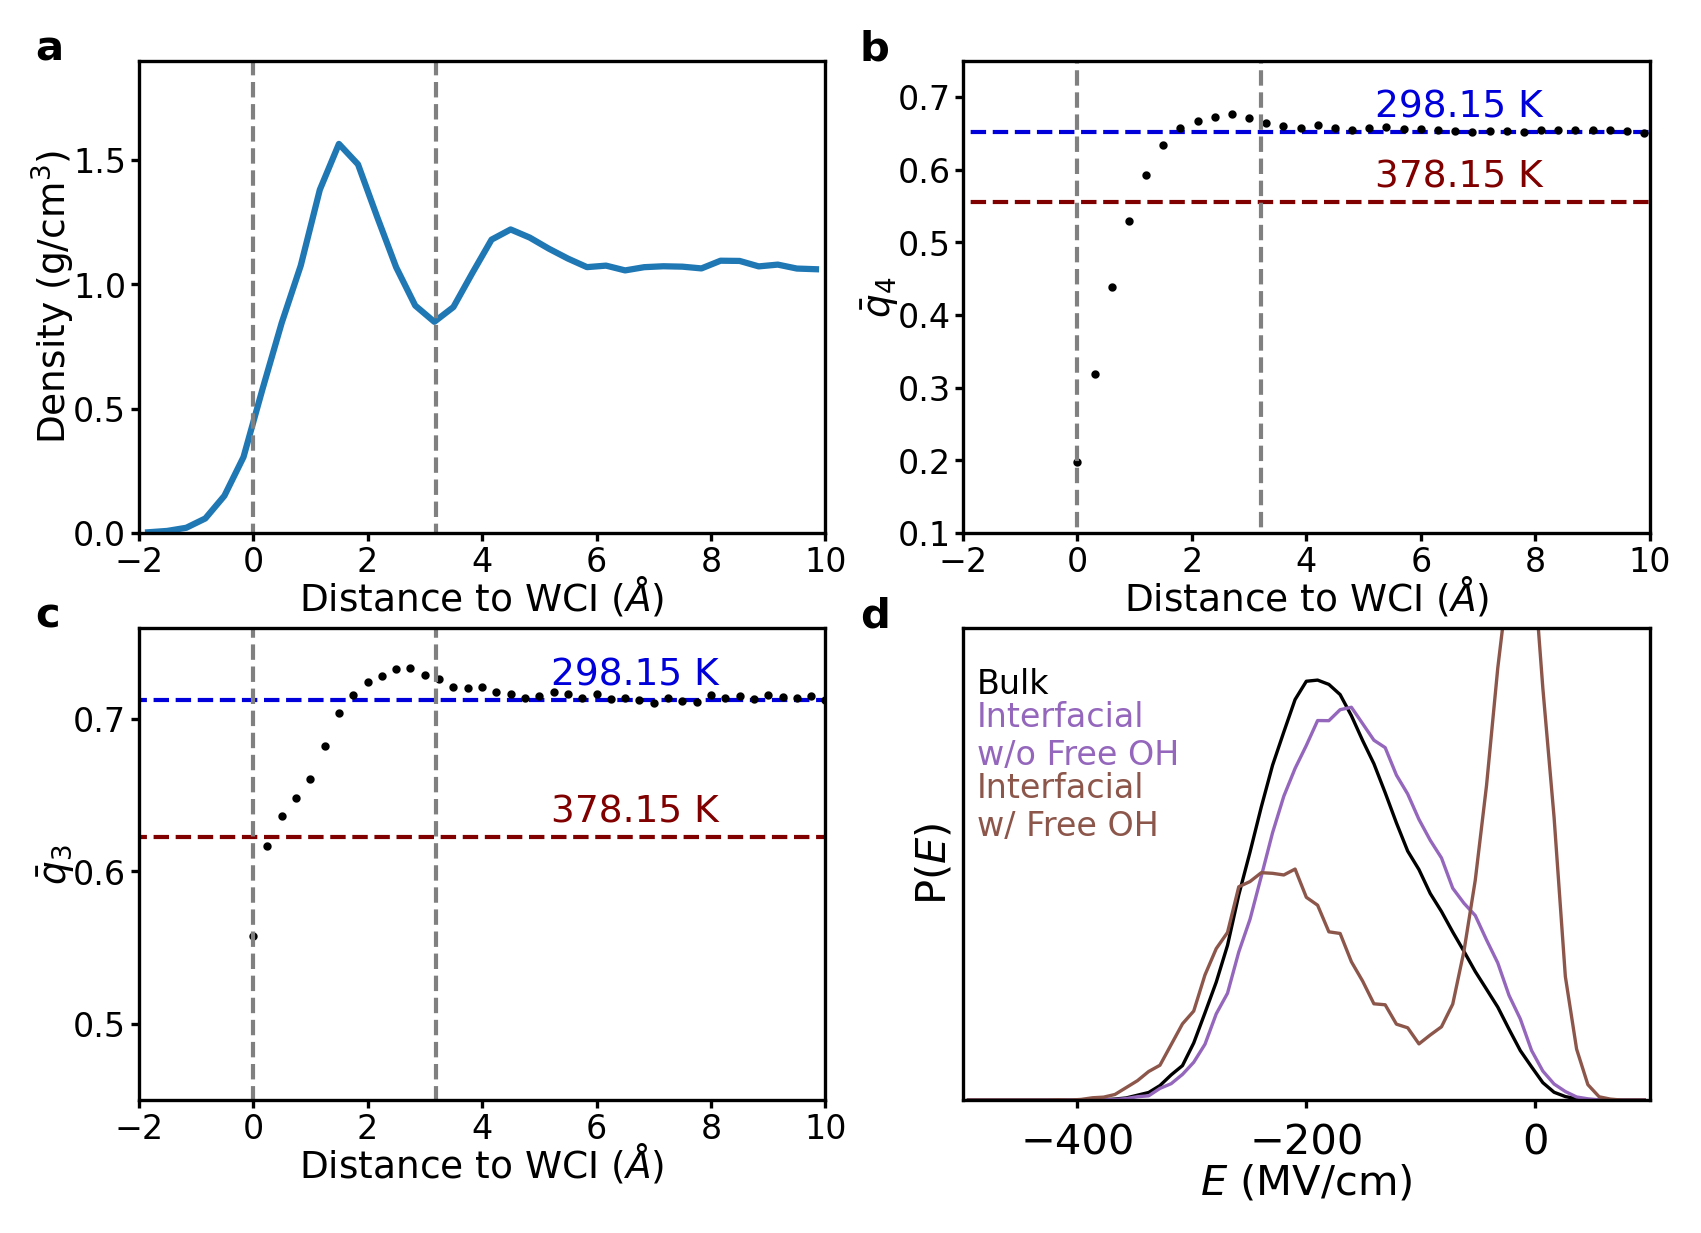

In [8]:
fs = 10
lw = 1.0
fig, axs = plt.subplots(2, 2, figsize=[6.5, 4.5], dpi=300)

labels2 = ['298.15 K', '378.15 K']
colors = pl.cm.seismic(np.linspace(0.2,1,2))


axs[0,0].plot(unco, 
                 coco/boxW/binw/len(iidis)/(1/18.02 * 6.022 * 10**23 / 10**24), 
                 #linewdith=lw,
                 zorder=1)

axs[0,0].plot([0]*2, [-1, 2], c='grey', linestyle='dashed', linewidth=1.0)
axs[0,0].plot([3.2]*2, [-1, 2], c='grey', linestyle='dashed', linewidth=1.0)


    

axs[0,1].scatter(q4points[:,0], q4points[:,1], s=1, c='black', zorder=1)
axs[0,1].plot([0.0]*2, [-1, 2], c='grey', linestyle='dashed', linewidth=1.0)
axs[0,1].plot([3.2]*2, [-1, 2], c='grey', linestyle='dashed', linewidth=1.0)




for i in [0, 1]:
    axs[0,1].text(5.2, q4T[i] + 0.02, labels2[i], fontsize=fs-1, color = colors[i])
    axs[0,1].plot([-35, 30], [q4T[i], q4T[i]], color = colors[i], linestyle='dashed', linewidth=1,  zorder=-1)

        
        
axs[1,0].scatter(q3points[:,0], q3points[:,1], s=1, c='black', zorder=1)
axs[1,0].plot([3.2]*2, [-1, 2], c='grey', linestyle='dashed', linewidth=1.0)
axs[1,0].plot([0]*2, [-1, 2], c='grey', linestyle='dashed', linewidth=1.0)



for i in [0, 1]:
    axs[1,0].text(5.2, q3T[i] + 0.01, labels2[i], fontsize=fs-1, color = colors[i])
    axs[1,0].plot([-35, 30], [q3T[i], q3T[i]], color = colors[i], linestyle='dashed', linewidth=1, zorder=-1)

        
chere = ['black', 'C4', 'C5']

labels00 = ['Bulk', 'Interfacial\nw/o Free OH', 'Interfacial\nw/ Free OH']





for i in range(3):
    divisor = np.sum(amoeba_interface_fields[i+1]) * (amoeba_interface_fields[0][30] - amoeba_interface_fields[0][29])
    axs[1,1].plot(amoeba_interface_fields[0]*100, amoeba_interface_fields[i+1]/divisor/100, linewidth=0.8, c=chere[i])

    #print(simps(amoeba_interface_fields[i+1]/divisor, amoeba_interface_fields[0]*100))


for i in range(3):
    axs[1,1].text(0.02, 0.86 - i*0.15, labels00[i],c=chere[i],fontsize=fs - 2,
              transform = axs[1,1].transAxes)

axs[1,1].set_xlabel('$E$ (MV/cm)', fontsize=fs, labelpad = 0)
axs[1,1].set_ylabel("P($E$)", fontsize=fs, labelpad = 0)
axs[1,1].set_xlim(-500, 100)
axs[1,1].set_ylim(0, 0.0065)
axs[1,1].set_yticks([])
axs[1,1].tick_params(size=2, labelsize=fs)
        
        
xlabels = ['Distance to WCI ($\AA$)']*3

ylabels = ["Density (g/cm$^3$)", '$\\bar{q}_4}$','$\\bar{q}_3}$']


xlims =    [[-2, 10]]*3

ylims =    [[0.0, 1.9], [0.1, 0.75], [0.45, 0.76]]


axis_indices = [[0, 0], [0, 1], [1,0], [1, 1]]

for i in range(2):
    for j in range(2):
        index = i*2 + j
        axs[i, j].set_xlabel(xlabels[index], fontsize=fs-1, labelpad = -1)
        axs[i, j].set_ylabel(ylabels[index], fontsize=fs-1, labelpad = -1)
        axs[i, j].set_xlim(xlims[index][0], xlims[index][1])
        axs[i, j].set_ylim(ylims[index][0], ylims[index][1])
        axs[i, j].tick_params(size=2, labelsize=fs-2, pad=1)
        
        if i == 1:
            break
            
    if i == 1:
        break
        
    

        
axs[1,0].set_yticks([0.5, 0.6, 0.7], size=2)

axs[0,0].text(-0.15, 1.0, 'a', transform=axs[0,0].transAxes, weight="bold")
axs[0,1].text(-0.15, 1.0, 'b', transform=axs[0,1].transAxes, zorder=1, weight="bold")
axs[1,0].text(-0.15, 1.0, 'c', transform=axs[1,0].transAxes, zorder=1, weight="bold")
axs[1,1].text(-0.15, 1.0, 'd', transform=axs[1,1].transAxes, zorder=1, weight="bold")


# plt.subplots_adjust(#left=0.1,
#                     #bottom=0.0, 
#                     #right=0.4, 
#                     #top=0.0, 
#                     wspace=0.27, 
#                     hspace=0.0)

#plt.savefig("Fig3.pdf", transparent=True)



In [9]:
spce_noshift_spectra = np.load("spce_no_shiftspectra.npy")
spce_interface_fields = np.load("spce_interface_fields.npy",
                           allow_pickle=True)

spce_interface_fields[[1, 2, 3]] = spce_interface_fields[[3, 1, 2]]


binw = spce_interface_fields[0][1] - spce_interface_fields[0][0]




curve = lambda freq, h1, h2, h3, f1, f2, f3, w1, w2, w3: (1*h1*np.exp(-((freq - f1)/w1)**2)
                                              + h2*np.exp(-((freq - f2)/w2)**2)
                                              + h3*np.exp(-((freq - f3)/w3)**2))

spce_sc_param = np.load("spcesc_param.npy")
spce_shift_sc = np.load("spceshift_sc.npy")




spce_collect1 = np.load("spce_spectra_by_distance.npy")
#collect2 = np.load("spectra_by_distance7.npy")

amoeba_collect1 = np.load("amoeba_spectra_by_distance.npy")
#collect2 = np.load("../../quantum/clean_model_construction/results/spectra_by_distance7.npy")

spce_noshift_sc_param = np.load("spce_noshift_sc_param.npy")
spce_noshift_sc = np.load("spce_noshift_sc.npy")



amoeba_interface_fields = np.load("amoeba_interface_fields.npy",
                           allow_pickle=True)

amoeba_interface_fields[[1, 2, 3]] = amoeba_interface_fields[[3, 1, 2]]



amoeba_noshift_sc_param = np.load("amoeba_noshift_sc_param.npy")
amoeba_noshift_sc = np.load("amoeba_noshift_sc.npy")


amoeba_sc_param = np.load("amoeba_sc_param.npy")
amoeba_shift_sc = np.load("amoeba_shift_sc.npy")

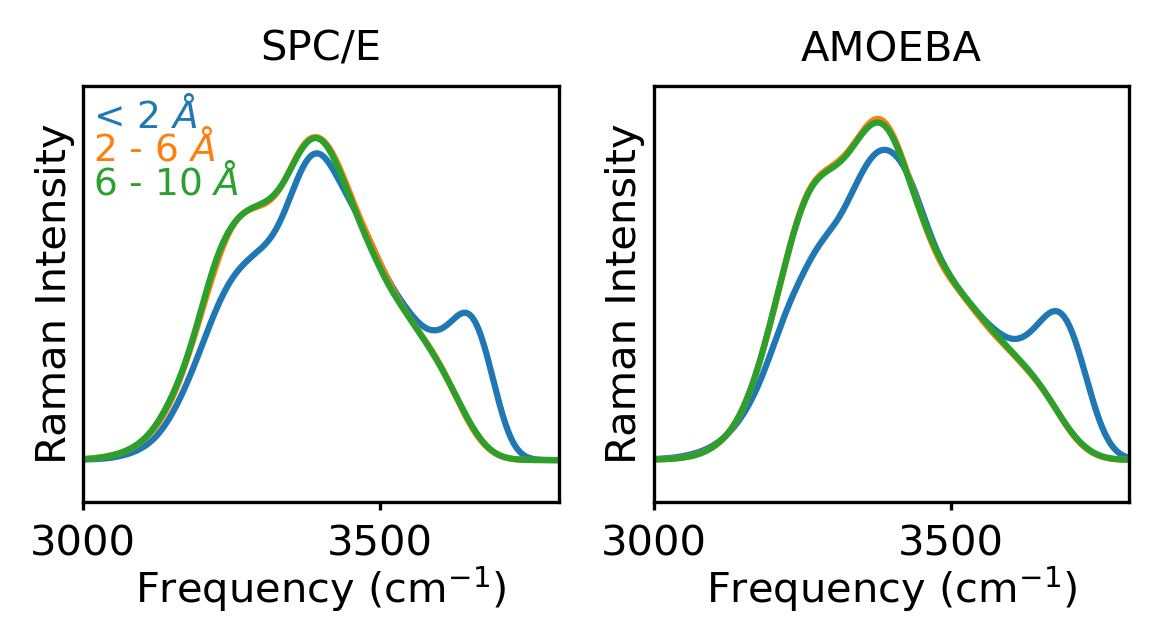

In [10]:
fig, axs = plt.subplots(1, 2, figsize=[4.5, 1.8], dpi=300)

for i in range(3):
    axs[0].plot(spce_collect1[0], spce_collect1[i+1])
    
    axs[1].plot(spce_collect1[0], amoeba_collect1[i+1])


xlims =  [[3000, 3800], [3000, 3800]]  
ylims =  [[-0.002, 0.018], [-0.0019, 0.017], [-0.0019, 0.017]]


ylabels = ['Raman Intensity', 'Raman Intensity', 'Raman Intensity']

xlabels = ['Frequency (cm$^{-1}$)', 'Frequency (cm$^{-1}$)']

yticks = [[], [], []]
chere = ['C0', 'C1', 'C2']

  
    
for i in range(0,2):
    axs[i].set_xlabel(xlabels[i], fontsize=fs, labelpad = 0)
    axs[i].set_ylabel(ylabels[i], fontsize=fs, labelpad = 0)
    axs[i].set_xlim(xlims[i][0], xlims[i][1])
    axs[i].set_ylim(ylims[i][0], ylims[i][1])
    axs[i].set_yticks(yticks[i])
    axs[i].tick_params(size=2, labelsize=fs) 
    
    
axs[0].set_title("SPC/E", fontsize=fs)
axs[1].set_title("AMOEBA", fontsize=fs)

labels= ['< 2 $\AA$', '2 - 6 $\AA$', '6 - 10 $\AA$']



for i in range(3):
    axs[0].text(0.02, 0.9 - i*0.08, labels[i],c=chere[i],fontsize=fs - 1,
              transform = axs[0].transAxes)

99.94418300276232
100.06571947174098
99.8992055021941


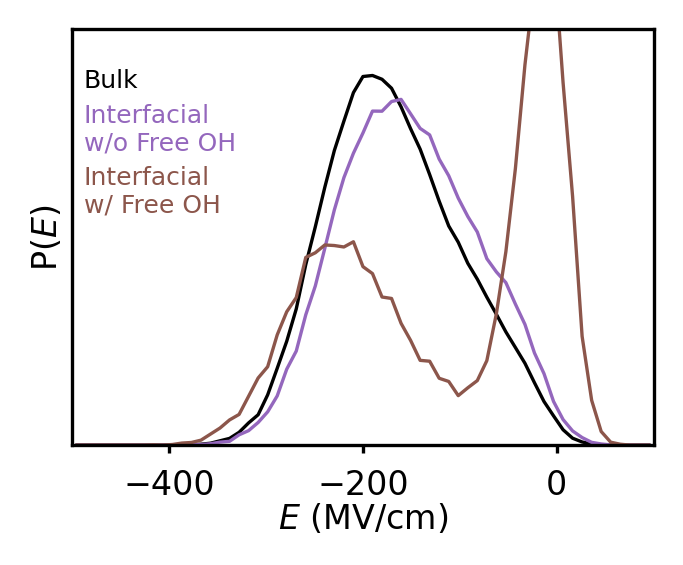

In [11]:
fs = 8
lw = 0.5

from scipy.integrate import simps
fig, ax = plt.subplots(1, 1, figsize=[2.5, 1.8], dpi=300)

chere = ['black', 'C4', 'C5']

labels00 = ['Bulk', 'Interfacial\nw/o Free OH', 'Interfacial\nw/ Free OH']





for i in range(3):
    divisor = np.sum(amoeba_interface_fields[i+1]) * (amoeba_interface_fields[0][30] - amoeba_interface_fields[0][29])
    ax.plot(amoeba_interface_fields[0]*100, amoeba_interface_fields[i+1]/divisor/100, linewidth=0.8, c=chere[i])

    print(simps(amoeba_interface_fields[i+1]/divisor, amoeba_interface_fields[0]*100))


for i in range(3):
    ax.text(0.02, 0.86 - i*0.15, labels00[i],c=chere[i],fontsize=fs - 2,
              transform = ax.transAxes)

ax.set_xlabel('$E$ (MV/cm)', fontsize=fs, labelpad = 0)
ax.set_ylabel("P($E$)", fontsize=fs, labelpad = 0)
ax.set_xlim(-500, 100)
ax.set_ylim(0, 0.0065)
ax.set_yticks([])
ax.tick_params(size=2, labelsize=fs)

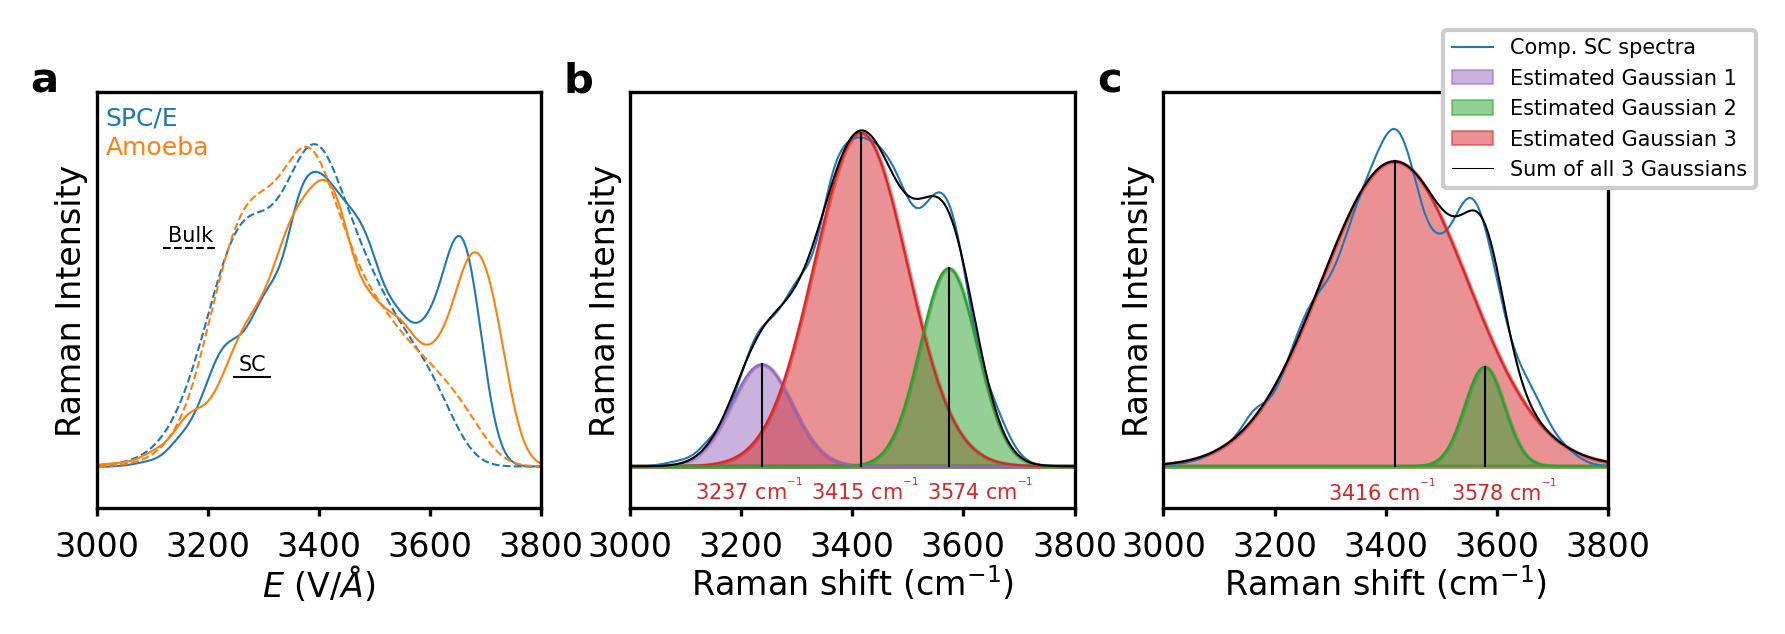

In [12]:
fs = 8
lw = 0.5


fig, axs = plt.subplots(1, 3, figsize=[6.5, 1.8], dpi=300)

chere = ['C1', 'C5', 'C0']
xx = spce_noshift_sc[0]



axs[0].plot(spce_shift_sc[0], spce_noshift_sc[1], c = chere[2], linewidth=0.5)
axs[0].plot(spce_collect1[0], spce_collect1[4], c = chere[2], linestyle='dashed', alpha=1.0, linewidth=lw)

axs[0].plot(spce_shift_sc[0], amoeba_noshift_sc[1], c = chere[0], linewidth=0.5)
axs[0].plot(spce_collect1[0], amoeba_collect1[4], c = chere[0], linestyle='dashed', alpha=1.0, linewidth=lw)

    
labels10 = ['SPC/E', 'Amoeba']


axs[0].text(0.02, 0.92, labels10[0],c=chere[2],fontsize=fs - 2,
              transform = axs[0].transAxes)
axs[0].text(0.02, 0.85, labels10[1],c=chere[0],fontsize=fs-2,
              transform = axs[0].transAxes)


xbulk = 0.16
ybulk = 0.64
xsc = 0.32
ysc = 0.33

axs[0].text(xbulk, ybulk, 'Bulk',fontsize=fs - 3,
              transform = axs[0].transAxes)
axs[0].text(xsc, ysc, 'SC', fontsize=fs-3,
              transform = axs[0].transAxes)

axs[0].plot([xbulk - 0.01, xbulk + 0.11], 
            [ybulk-0.015, ybulk-0.015], 
            transform = axs[0].transAxes, 
            c='black', 
            linewidth=0.5,
            linestyle='dashed')
    
axs[0].plot([xsc - 0.01, xsc + 0.07], 
            [ysc-0.015, ysc-0.015], 
            transform = axs[0].transAxes, 
            c='black', 
            linewidth=0.5,
            )


#plot 1
axs[1].plot(spce_shift_sc[0], spce_shift_sc[1], c='C0', linewidth=lw)

xx = spce_shift_sc[0]
alterparam = np.copy(spce_sc_param)
alterparam[1:3] = 0
yy = curve(xx, *alterparam)
axs[1].plot(xx, yy, c='C4', linewidth=lw)
axs[1].fill_between(xx, yy, 0, color='C4', alpha = 0.5)
yy2 = np.copy(yy)

alterparam = np.copy(spce_sc_param)
alterparam[[0, 2]] = 0
yy = curve(xx, *alterparam)
yy1 = np.copy(yy)
axs[1].plot(xx, yy, c='C3', linewidth=lw)
axs[1].fill_between(xx, yy, 0, color='C3', alpha = 0.5)


alterparam = np.copy(spce_sc_param)
alterparam[:2] = 0
yy = curve(xx, *alterparam)
axs[1].plot(xx, yy, c='C2', linewidth=lw)
axs[1].fill_between(xx, yy, 0, color='C2', alpha = 0.5)

axs[1].plot(xx, yy1 + yy2 + yy, c='black', linewidth=lw)


axs[1].plot([spce_sc_param[4]]*2, [0, np.max(yy1)], c='black', linewidth=lw)
axs[1].plot([spce_sc_param[5]]*2, [0, np.max(yy)], c='black', linewidth=lw)
axs[1].plot([spce_sc_param[3]]*2, [0, np.max(yy2)], c='black', linewidth=lw)


axs[1].text(spce_sc_param[4]-90, -np.max(spce_shift_sc[1])/10,
            str(int(np.round(spce_sc_param[4], 0))) + ' cm$^{^{-1}}$', fontsize=fs-3, c='tab:red')
axs[1].text(spce_sc_param[5]-40, -np.max(spce_shift_sc[1])/10,
            str(int(np.round(spce_sc_param[5], 0))) + ' cm$^{^{-1}}$', fontsize=fs-3, c='tab:red')
axs[1].text(spce_sc_param[3]-120, -np.max(spce_shift_sc[1])/10,
            str(int(np.round(spce_sc_param[3], 0))) + ' cm$^{^{-1}}$', fontsize=fs-3, c='tab:red')

#plot 2
axs[2].plot(amoeba_shift_sc[0], amoeba_shift_sc[1], c='C0', linewidth=lw)

xx = spce_shift_sc[0]
alterparam = np.copy(amoeba_sc_param)
alterparam[1:3] = 0
yy = curve(xx, *alterparam)
#axs[2].plot(xx, yy, c='C4', linewidth=lw)
#axs[2].fill_between(xx, yy, 0, color='C4', alpha = 0.5)
yy2 = np.copy(yy)

alterparam = np.copy(amoeba_sc_param)
alterparam[[0, 2]] = 0
yy = curve(xx, *alterparam)
yy1 = np.copy(yy)
axs[2].plot(xx, yy, c='C3', linewidth=lw)
axs[2].fill_between(xx, yy, 0, color='C3', alpha = 0.5)


alterparam = np.copy(amoeba_sc_param)
alterparam[:2] = 0
yy = curve(xx, *alterparam)
axs[2].plot(xx, yy, c='C2', linewidth=lw)
axs[2].fill_between(xx, yy, 0, color='C2', alpha = 0.5)

axs[2].plot(xx, yy1 + yy2 + yy, c='black', linewidth=lw)


axs[2].plot([amoeba_sc_param[4]]*2, [0, np.max(yy1)], c='black', linewidth=lw)
axs[2].plot([amoeba_sc_param[5]]*2, [0, np.max(yy)], c='black', linewidth=lw)
axs[2].plot([amoeba_sc_param[3]]*2, [0, np.max(yy2)], c='black', linewidth=lw)


axs[2].text(amoeba_sc_param[4]-120, -np.max(amoeba_shift_sc[1])/10,
            str(int(np.round(amoeba_sc_param[4], 0))) + ' cm$^{^{-1}}$', fontsize=fs-3, c='tab:red')
axs[2].text(amoeba_sc_param[5]-60, -np.max(amoeba_shift_sc[1])/10,
            str(int(np.round(amoeba_sc_param[5], 0))) + ' cm$^{^{-1}}$', fontsize=fs-3, c='tab:red')



xlims =  [[3000, 3800], [3000, 3800], [3000, 3800]]

        

ylims =  [[-0.002, 0.018], [-0.0019, 0.017], [-0.0019, 0.017]]


ylabels = ['Raman Intensity', 'Raman Intensity', 'Raman Intensity']

xlabels = ['$E$ (V/$\AA$)', 'Raman shift (cm$^{-1}$)', 'Raman shift (cm$^{-1}$)']

yticks = [[], [], []]


for i in range(0,3):
    axs[i].set_xlabel(xlabels[i], fontsize=fs, labelpad = 0)
    axs[i].set_ylabel(ylabels[i], fontsize=fs, labelpad = 0)
    axs[i].set_xlim(xlims[i][0], xlims[i][1])
    axs[i].set_ylim(ylims[i][0], ylims[i][1])
    axs[i].set_yticks(yticks[i])
    axs[i].tick_params(size=2, labelsize=fs)
    
    
axs[0].text(-0.15, 1.0, 'a', transform=axs[0].transAxes, weight="bold")
axs[1].text(-0.15, 1.0, 'b', transform=axs[1].transAxes, zorder=1, weight="bold")
axs[2].text(-0.15, 1.0, 'c', transform=axs[2].transAxes, zorder=1, weight="bold")

point1 = np.array([1, 1])
point2 = np.array([2, 2])
axs[2].plot(point1, point2, c='C0',  alpha=1.0, linewidth=lw, label='Comp. SC spectra')
axs[2].fill_between(point1, point2, color='C4',  alpha=0.5, linewidth=lw, label='Estimated Gaussian 1')
axs[2].fill_between(point1, point2, color='C2',  alpha=0.5, linewidth=lw, label='Estimated Gaussian 2')
axs[2].fill_between(point1, point2, color='C3',  alpha=0.5, linewidth=lw, label='Estimated Gaussian 3')
axs[2].plot(point1, point2, c='black',  alpha=1.0, linewidth=lw/2, label='Sum of all 3 Gaussians')
axs[2].legend(fontsize=fs-3, loc=[0.63, 0.77], framealpha=1)



#axs[1].text(0.02, 0.9, 'Bulk', transform=axs[1].transAxes)
#axs[1].text(0.02, 0.8, 'SC', transform=axs[1].transAxes, zorder=1)

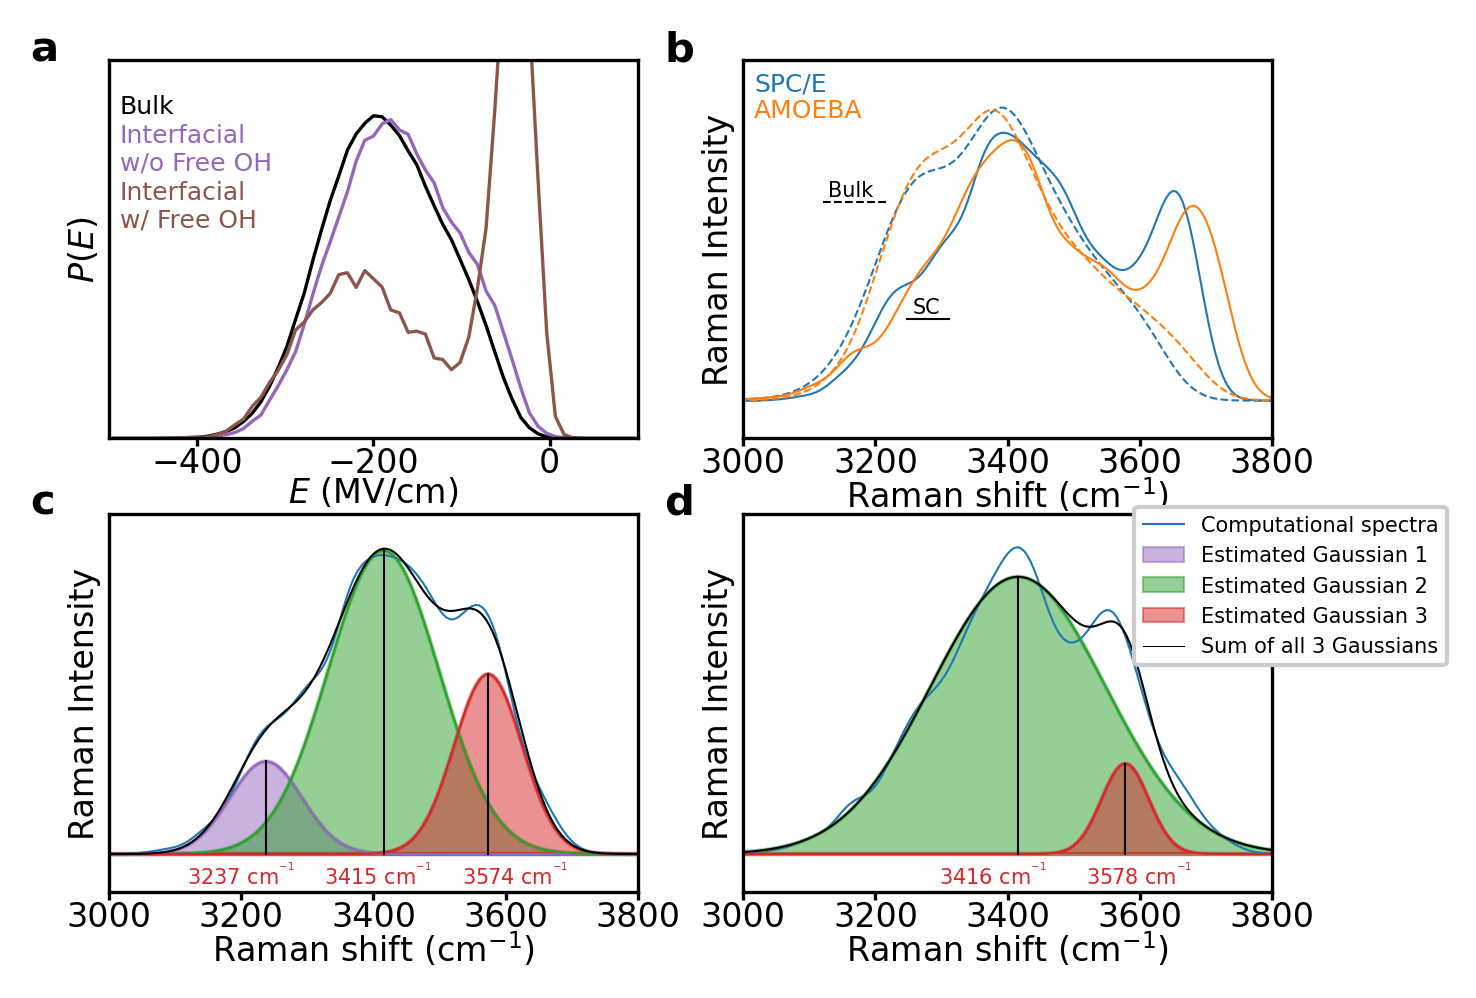

In [13]:
fs = 8
lw = 0.5


fig, axs = plt.subplots(2, 2, figsize=[5., 3.6], dpi=300)

chere = ['black', 'C4', 'C5']

labels00 = ['Bulk', 'Interfacial\nw/o Free OH', 'Interfacial\nw/ Free OH']



fig4a = []

for i in range(3):
    divisor = np.sum(spce_interface_fields[i+1]) * (spce_interface_fields[0][30] - spce_interface_fields[0][29])
    axs[0, 0].plot(spce_interface_fields[0]*100, spce_interface_fields[i+1]/divisor, linewidth=0.8, c=chere[i])
    
    fig4a.append(spce_interface_fields[i+1]/divisor)
    
fig4a.insert(0, spce_interface_fields[0]*100)

np.savetxt("fig4a.csv", np.array(fig4a).T, delimiter=",")

    
for i in range(3):
    axs[0, 1].text(0.02, 0.86 - i*0.15, labels00[i],c=chere[i],fontsize=fs - 2,
              transform = axs[0, 0].transAxes)



chere = ['C1', 'C5', 'C0']


xx = spce_noshift_sc[0]

axs[0, 1].plot(spce_shift_sc[0], spce_noshift_sc[1], c = chere[2], linewidth=0.5)
axs[0, 1].plot(spce_shift_sc[0], spce_collect1[4], c = chere[2], linestyle='dashed', alpha=1.0, linewidth=lw)

axs[0, 1].plot(spce_shift_sc[0], amoeba_noshift_sc[1], c = chere[0], linewidth=0.5)
axs[0, 1].plot(spce_shift_sc[0], amoeba_collect1[4], c = chere[0], linestyle='dashed', alpha=1.0, linewidth=lw)

fig4b = np.array([spce_shift_sc[0],
                  spce_collect1[4],
                  amoeba_collect1[4],
                  spce_noshift_sc[1],
                  amoeba_noshift_sc[1],
                ]).T

np.savetxt("fig4b.csv", fig4b, delimiter=",")
labels10 = ['SPC/E', 'AMOEBA']


axs[0, 1].text(0.02, 0.92, labels10[0],c=chere[2],fontsize=fs - 2,
              transform = axs[0, 1].transAxes)
axs[0, 1].text(0.02, 0.85, labels10[1],c=chere[0],fontsize=fs-2,
              transform = axs[0, 1].transAxes)


xbulk = 0.16
ybulk = 0.64
xsc = 0.32
ysc = 0.33

axs[0, 1].text(xbulk, ybulk, 'Bulk',fontsize=fs - 3,
              transform = axs[0, 1].transAxes)
axs[0, 1].text(xsc, ysc, 'SC', fontsize=fs-3,
              transform = axs[0, 1].transAxes)

axs[0, 1].plot([xbulk - 0.01, xbulk + 0.11], 
            [ybulk-0.015, ybulk-0.015], 
            transform = axs[0, 1].transAxes, 
            c='black', 
            linewidth=0.5,
            linestyle='dashed')
    
axs[0, 1].plot([xsc - 0.01, xsc + 0.07], 
            [ysc-0.015, ysc-0.015], 
            transform = axs[0, 1].transAxes, 
            c='black', 
            linewidth=0.5,
            )


#plot 1
axs[1, 0].plot(spce_shift_sc[0], spce_shift_sc[1], c='C0', linewidth=lw)

fig4cd = np.array([spce_shift_sc[0], spce_shift_sc[1], amoeba_shift_sc[1]]).T
np.savetxt("fig4cd.csv", fig4cd, delimiter=",")


xx = spce_shift_sc[0]
alterparam = np.copy(spce_sc_param)
alterparam[1:3] = 0
yy = curve(xx, *alterparam)
axs[1, 0].plot(xx, yy, c='C4', linewidth=lw)
axs[1, 0].fill_between(xx, yy, 0, color='C4', alpha = 0.5)
yy2 = np.copy(yy)

alterparam = np.copy(spce_sc_param)
alterparam[[0, 2]] = 0
yy = curve(xx, *alterparam)
yy1 = np.copy(yy)
axs[1, 0].plot(xx, yy, c='C2', linewidth=lw)
axs[1, 0].fill_between(xx, yy, 0, color='C2', alpha = 0.5)


alterparam = np.copy(spce_sc_param)
alterparam[:2] = 0
yy = curve(xx, *alterparam)
axs[1, 0].plot(xx, yy, c='C3', linewidth=lw)
axs[1, 0].fill_between(xx, yy, 0, color='C3', alpha = 0.5)

axs[1, 0].plot(xx, yy1 + yy2 + yy, c='black', linewidth=lw)


axs[1, 0].plot([spce_sc_param[4]]*2, [0, np.max(yy1)], c='black', linewidth=lw)
axs[1, 0].plot([spce_sc_param[5]]*2, [0, np.max(yy)], c='black', linewidth=lw)
axs[1, 0].plot([spce_sc_param[3]]*2, [0, np.max(yy2)], c='black', linewidth=lw)


axs[1, 0].text(spce_sc_param[4]-90, -np.max(spce_shift_sc[1])/10,
            str(int(np.round(spce_sc_param[4], 0))) + ' cm$^{^{-1}}$', fontsize=fs-3, c='tab:red')
axs[1, 0].text(spce_sc_param[5]-40, -np.max(spce_shift_sc[1])/10,
            str(int(np.round(spce_sc_param[5], 0))) + ' cm$^{^{-1}}$', fontsize=fs-3, c='tab:red')
axs[1, 0].text(spce_sc_param[3]-120, -np.max(spce_shift_sc[1])/10,
            str(int(np.round(spce_sc_param[3], 0))) + ' cm$^{^{-1}}$', fontsize=fs-3, c='tab:red')

#plot 2
axs[1, 1].plot(amoeba_shift_sc[0], amoeba_shift_sc[1], c='C0', linewidth=lw)

xx = spce_shift_sc[0]
alterparam = np.copy(amoeba_sc_param)
alterparam[1:3] = 0
yy = curve(xx, *alterparam)
#axs[1, 1].plot(xx, yy, c='C4', linewidth=lw)
#axs[1, 1].fill_between(xx, yy, 0, color='C4', alpha = 0.5)
yy2 = np.copy(yy)

alterparam = np.copy(amoeba_sc_param)
alterparam[[0, 2]] = 0
yy = curve(xx, *alterparam)
yy1 = np.copy(yy)
axs[1, 1].plot(xx, yy, c='C2', linewidth=lw)
axs[1, 1].fill_between(xx, yy, 0, color='C2', alpha = 0.5)


alterparam = np.copy(amoeba_sc_param)
alterparam[:2] = 0
yy = curve(xx, *alterparam)
axs[1, 1].plot(xx, yy, c='C3', linewidth=lw)
axs[1, 1].fill_between(xx, yy, 0, color='C3', alpha = 0.5)

axs[1, 1].plot(xx, yy1 + yy2 + yy, c='black', linewidth=lw)


axs[1, 1].plot([amoeba_sc_param[4]]*2, [0, np.max(yy1)], c='black', linewidth=lw)
axs[1, 1].plot([amoeba_sc_param[5]]*2, [0, np.max(yy)], c='black', linewidth=lw)
axs[1, 1].plot([amoeba_sc_param[3]]*2, [0, np.max(yy2)], c='black', linewidth=lw)


axs[1, 1].text(amoeba_sc_param[4]-120, -np.max(amoeba_shift_sc[1])/10,
            str(int(np.round(amoeba_sc_param[4], 0))) + ' cm$^{^{-1}}$', fontsize=fs-3, c='tab:red')
axs[1, 1].text(amoeba_sc_param[5]-60, -np.max(amoeba_shift_sc[1])/10,
            str(int(np.round(amoeba_sc_param[5], 0))) + ' cm$^{^{-1}}$', fontsize=fs-3, c='tab:red')



xlims =  np.array([[[-500, 100], [3000, 3800]], 
          [[3000, 3800], [3000, 3800]]], dtype='object')

        

ylims =  np.array([[[0, 0.65], [-0.002, 0.018]], 
                    [[-0.0019, 0.017], [-0.0019, 0.017]]], dtype='object')


ylabels = np.array([['$P(E)$', 'Raman Intensity'],
                    ['Raman Intensity', 'Raman Intensity']], dtype='object')

xlabels = np.array([['$E$ (MV/cm)', 'Raman shift (cm$^{-1}$)'],
                    ['Raman shift (cm$^{-1}$)', 'Raman shift (cm$^{-1}$)']], dtype='object')

yticks = np.array([[[0],[]],
                    [[], []]], dtype='object')


for i in range(0,2):
    for j in range(2):
        axs[i, j].set_xlabel(xlabels[i, j], fontsize=fs, labelpad = -1)
        axs[i, j].set_ylabel(ylabels[i, j], fontsize=fs, labelpad = 0)
        axs[i, j].set_xlim(xlims[i, j][0], xlims[i, j][1])
        axs[i, j].set_ylim(ylims[i, j][0], ylims[i, j][1])
        axs[i, j].set_yticks([])#yticks[i, j])
        axs[i, j].tick_params(size=2, labelsize=fs)
        axs[i, j].tick_params('x', pad=0)
    
    
axs[0,0].text(-0.15, 1.0, 'a', transform=axs[0,0].transAxes, weight="bold")
axs[0,1].text(-0.15, 1.0, 'b', transform=axs[0,1].transAxes, zorder=1, weight="bold")
axs[1,0].text(-0.15, 1.0, 'c', transform=axs[1,0].transAxes, zorder=1, weight="bold")
axs[1,1].text(-0.15, 1.0, 'd', transform=axs[1,1].transAxes, zorder=1, weight="bold")



point1 = np.array([1, 1])
point2 = np.array([2, 2])
axs[1,1].plot(point1, point2, c='C0',  alpha=1.0, linewidth=lw, label='Computational spectra')
axs[1,1].fill_between(point1, point2, color='C4',  alpha=0.5, linewidth=lw, label='Estimated Gaussian 1')
axs[1,1].fill_between(point1, point2, color='C2',  alpha=0.5, linewidth=lw, label='Estimated Gaussian 2')
axs[1,1].fill_between(point1, point2, color='C3',  alpha=0.5, linewidth=lw, label='Estimated Gaussian 3')
axs[1,1].plot(point1, point2, c='black',  alpha=1.0, linewidth=lw/2, label='Sum of all 3 Gaussians')
axs[1,1].legend(fontsize=fs-3, loc=[0.74, 0.6], framealpha=1)



#axs[1].text(0.02, 0.9, 'Bulk', transform=axs[1].transAxes)
#axs[1].text(0.02, 0.8, 'SC', transform=axs[1].transAxes, zorder=1)

In [14]:
# sc_param = np.load("../../quantum/clean_model_construction/results/decayshift_sc_param.npy")
# shift_sc = np.load("../../quantum/clean_model_construction/results/decayshift_sc.npy")

# amoeba_sc_param = np.load("../../quantum/clean_model_construction/results/amoeba_decaysc_param.npy")
# amoeba_shift_sc = np.load("../../quantum/clean_model_construction/results/amoeba_decayshift_sc.npy")


In [15]:
# fig, axs = plt.subplots(1, 2, figsize=[5., 1.8], dpi=300)


# #plot 1
# axs[0].plot(shift_sc[0], shift_sc[1], c='C0', linewidth=lw)

# xx = shift_sc[0]
# alterparam = np.copy(sc_param)
# alterparam[1:3] = 0
# yy = curve(xx, *alterparam)
# axs[0].plot(xx, yy, c='C4', linewidth=lw)
# axs[0].fill_between(xx, yy, 0, color='C4', alpha = 0.5)
# yy2 = np.copy(yy)

# alterparam = np.copy(sc_param)
# alterparam[[0, 2]] = 0
# yy = curve(xx, *alterparam)
# yy1 = np.copy(yy)
# axs[0].plot(xx, yy, c='C3', linewidth=lw)
# axs[0].fill_between(xx, yy, 0, color='C3', alpha = 0.5)


# alterparam = np.copy(sc_param)
# alterparam[:2] = 0
# yy = curve(xx, *alterparam)
# axs[0].plot(xx, yy, c='C2', linewidth=lw)
# axs[0].fill_between(xx, yy, 0, color='C2', alpha = 0.5)

# axs[0].plot(xx, yy1 + yy2 + yy, c='black', linewidth=lw)


# axs[0].plot([sc_param[4]]*2, [0, np.max(yy1)], c='black', linewidth=lw)
# axs[0].plot([sc_param[5]]*2, [0, np.max(yy)], c='black', linewidth=lw)
# axs[0].plot([sc_param[3]]*2, [0, np.max(yy2)], c='black', linewidth=lw)


# axs[0].text(sc_param[4]-90, -np.max(shift_sc[1])/10,
#             str(int(np.round(sc_param[4], 0))) + ' cm$^{^{-1}}$', fontsize=fs-3, c='tab:red')
# axs[0].text(sc_param[5]-40, -np.max(shift_sc[1])/10,
#             str(int(np.round(sc_param[5], 0))) + ' cm$^{^{-1}}$', fontsize=fs-3, c='tab:red')
# axs[0].text(sc_param[3]-120, -np.max(shift_sc[1])/10,
#             str(int(np.round(sc_param[3], 0))) + ' cm$^{^{-1}}$', fontsize=fs-3, c='tab:red')

# #plot 2
# axs[1].plot(amoeba_shift_sc[0], amoeba_shift_sc[1], c='C0', linewidth=lw)

# xx = shift_sc[0]
# alterparam = np.copy(amoeba_sc_param)
# alterparam[1:3] = 0
# yy = curve(xx, *alterparam)
# axs[1].plot(xx, yy, c='C4', linewidth=lw)
# axs[1].fill_between(xx, yy, 0, color='C4', alpha = 0.5)
# yy2 = np.copy(yy)

# alterparam = np.copy(amoeba_sc_param)
# alterparam[[0, 2]] = 0
# yy = curve(xx, *alterparam)
# yy1 = np.copy(yy)
# axs[1].plot(xx, yy, c='C3', linewidth=lw)
# axs[1].fill_between(xx, yy, 0, color='C3', alpha = 0.5)


# alterparam = np.copy(amoeba_sc_param)
# alterparam[:2] = 0
# yy = curve(xx, *alterparam)
# axs[1].plot(xx, yy, c='C2', linewidth=lw)
# axs[1].fill_between(xx, yy, 0, color='C2', alpha = 0.5)

# axs[1].plot(xx, yy1 + yy2 + yy, c='black', linewidth=lw)


# axs[1].plot([amoeba_sc_param[4]]*2, [0, np.max(yy1)], c='black', linewidth=lw)
# axs[1].plot([amoeba_sc_param[5]]*2, [0, np.max(yy)], c='black', linewidth=lw)
# axs[1].plot([amoeba_sc_param[3]]*2, [0, np.max(yy2)], c='black', linewidth=lw)


# axs[1].text(amoeba_sc_param[4]-120, -np.max(amoeba_shift_sc[1])/10,
#             str(int(np.round(amoeba_sc_param[4], 0))) + ' cm$^{^{-1}}$', fontsize=fs-3, c='tab:red')
# axs[1].text(amoeba_sc_param[5]-60, -np.max(amoeba_shift_sc[1])/10,
#             str(int(np.round(amoeba_sc_param[5], 0))) + ' cm$^{^{-1}}$', fontsize=fs-3, c='tab:red')




# xlims =  np.array([[[-500, 100], [3000, 3800]], 
#           [[3000, 3800], [3000, 3800]]], dtype='object')

        

# ylims =  np.array([[[0, 0.65], [-0.002, 0.018]], 
#                     [[-0.0019, 0.017], [-0.0019, 0.017]]], dtype='object')


# ylabels = np.array([['$P(E)$', 'Raman Intensity'],
#                     ['Raman Intensity', 'Raman Intensity']], dtype='object')

# xlabels = np.array([['$E$ (MV/cm)', 'Raman shift (cm$^{-1}$)'],
#                     ['Raman shift (cm$^{-1}$)', 'Raman shift (cm$^{-1}$)']], dtype='object')

# yticks = np.array([[[0, 0.25, 0.5],[]],
#                     [[], []]], dtype='object')


# for i in range(0,2):
#     axs[i].set_xlabel(xlabels[i, j], fontsize=fs, labelpad = -1)
#     axs[i].set_ylabel(ylabels[i, j], fontsize=fs, labelpad = 0)
#     axs[i].set_xlim(xlims[i, j][0], xlims[i, j][1])
#     axs[i].set_ylim(ylims[i, j][0], ylims[i, j][1])
#     axs[i].set_yticks(yticks[i, j])
#     axs[i].tick_params(size=2, labelsize=fs)
#     axs[i].tick_params('x', pad=0)
    

# point1 = np.array([1, 1])
# point2 = np.array([2, 2])
# axs[1].plot(point1, point2, c='C0',  alpha=1.0, linewidth=lw, label='Computational spectra')
# axs[1].fill_between(point1, point2, color='C4',  alpha=0.5, linewidth=lw, label='Estimated Gaussian 1')
# axs[1].fill_between(point1, point2, color='C2',  alpha=0.5, linewidth=lw, label='Estimated Gaussian 2')
# axs[1].fill_between(point1, point2, color='C3',  alpha=0.5, linewidth=lw, label='Estimated Gaussian 3')
# axs[1].plot(point1, point2, c='black',  alpha=1.0, linewidth=lw/2, label='Sum of all 3 Gaussians')
# axs[1].legend(fontsize=fs-3, loc=[0.74, 0.6], framealpha=1)
    
# axs[0].set_title('SPC/E', fontsize=fs)
# axs[1].set_title('AMOEBA', fontsize=fs)



<ErrorbarContainer object of 3 artists>

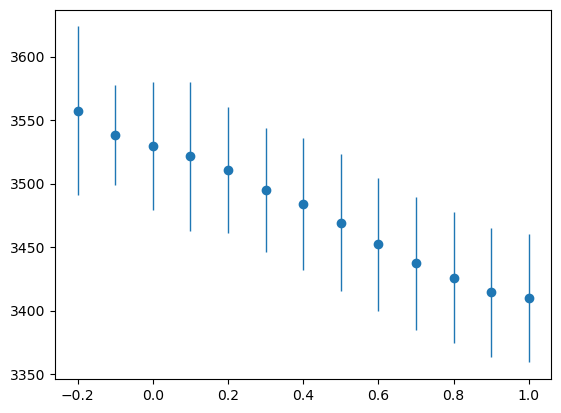

In [19]:
spce_q4_correlation = np.load("../spce_interface/q4_freq_correlation.npy")
amoeba_q4_correlation = np.load("../amoeba_interface/amoebaq4_freq_correlation.npy")


q4s = np.linspace(-0.2, 1.0, 13)

binw = q4s[1] - q4s[0]

avg_spce = []
std_spce = []

for x in q4s:
    q4w = np.where(np.abs(spce_q4_correlation[0] - x) < binw/2)
    avg_spce.append(np.average(spce_q4_correlation[1][q4w]))
    std_spce.append(np.std(spce_q4_correlation[1][q4w]))

avg_amoeba = []
std_amoeba = []

for x in q4s:
    q4w = np.where(np.abs(amoeba_q4_correlation[0] - x) < binw/2)
    avg_amoeba.append(np.average(amoeba_q4_correlation[1][q4w]))
    std_amoeba.append(np.std(amoeba_q4_correlation[1][q4w]))

plt.scatter(q4s, avg_amoeba)
plt.errorbar(q4s, avg_amoeba, yerr = std_amoeba, linewidth=0, elinewidth=1.0)

Text(-0.15, 1.0, 'd')

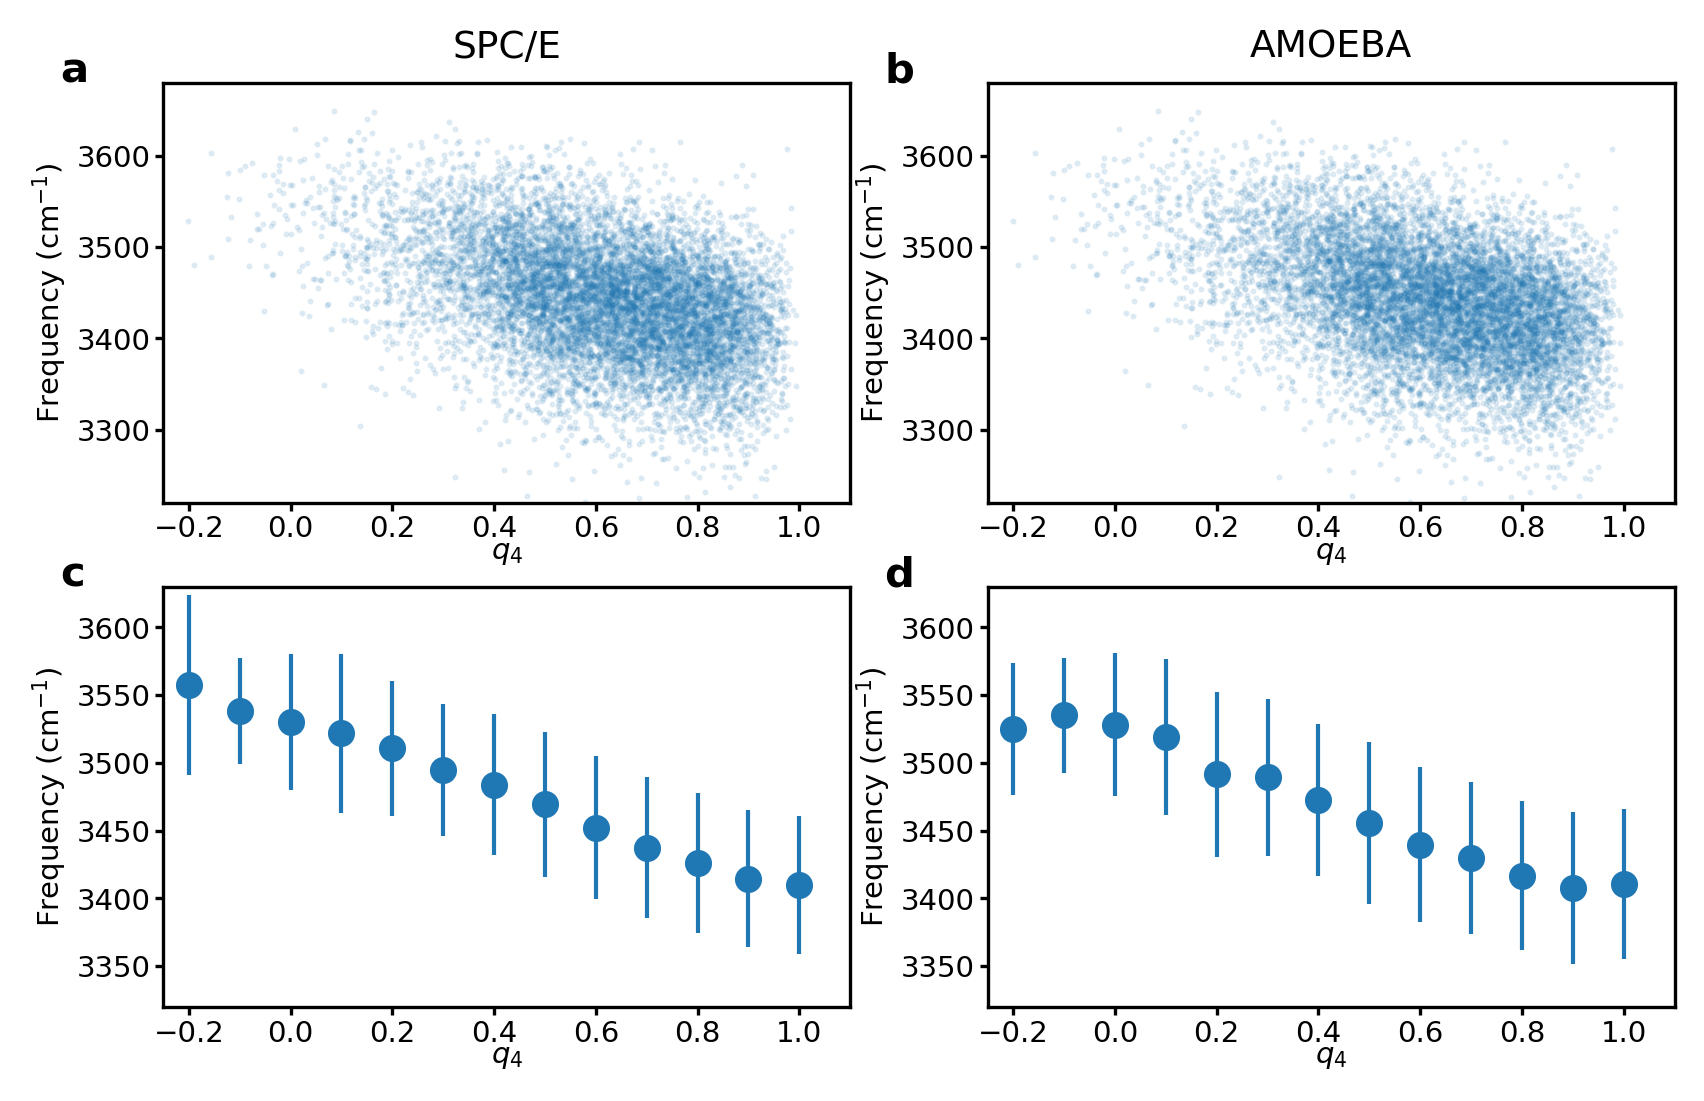

In [36]:
fs=9

fig, axs = plt.subplots(2, 2, figsize=[6.5, 4.0], dpi=300)

axs[0,0].scatter(spce_q4_correlation[0], spce_q4_correlation[1], c='C0', linewidth=lw, alpha=0.1, s=1)
axs[0,1].scatter(spce_q4_correlation[0], spce_q4_correlation[1], c='C0', linewidth=lw, alpha=0.1, s=1)

axs[1,0].scatter(q4s, avg_amoeba, c='C0', linewidth=lw, alpha=1.0)
axs[1,0].errorbar(q4s, avg_amoeba, yerr = std_amoeba, linewidth=0, elinewidth=1.0)
axs[1,1].scatter(q4s, avg_spce, c='C0', linewidth=lw, alpha=1.0)
axs[1,1].errorbar(q4s, avg_spce, yerr = std_spce, linewidth=0, elinewidth=1.0)


xlim = [-0.25, 1.1]
ylim = [[3220, 3680], [3320, 3630]]
ylabel = 'Frequency (cm$^{-1}$)'
xlabel = '$q_4$'

for i in range(2):
    for j in range(2):
        axs[j,i].set_xlabel(xlabel, fontsize=fs-2, labelpad = -1)
        axs[j,i].set_ylabel(ylabel, fontsize=fs-2, labelpad = 2)
        axs[j,i].set_xlim(xlim[0], xlim[1])
        axs[j,i].set_ylim(ylim[j][0], ylim[j][1])
        axs[j,i].tick_params(size=2, labelsize=fs-2, pad=1)





axs[0,0].set_title('SPC/E', fontsize=fs)
axs[0,1].set_title('AMOEBA', fontsize=fs)



axs[0,0].text(-0.15, 1.0, 'a', transform=axs[0,0].transAxes, weight="bold")
axs[0,1].text(-0.15, 1.0, 'b', transform=axs[0,1].transAxes, zorder=1, weight="bold")
axs[1,0].text(-0.15, 1.0, 'c', transform=axs[1,0].transAxes, zorder=1, weight="bold")
axs[1,1].text(-0.15, 1.0, 'd', transform=axs[1,1].transAxes, zorder=1, weight="bold")

Text(0.5, 1.0, 'AMOEBA')

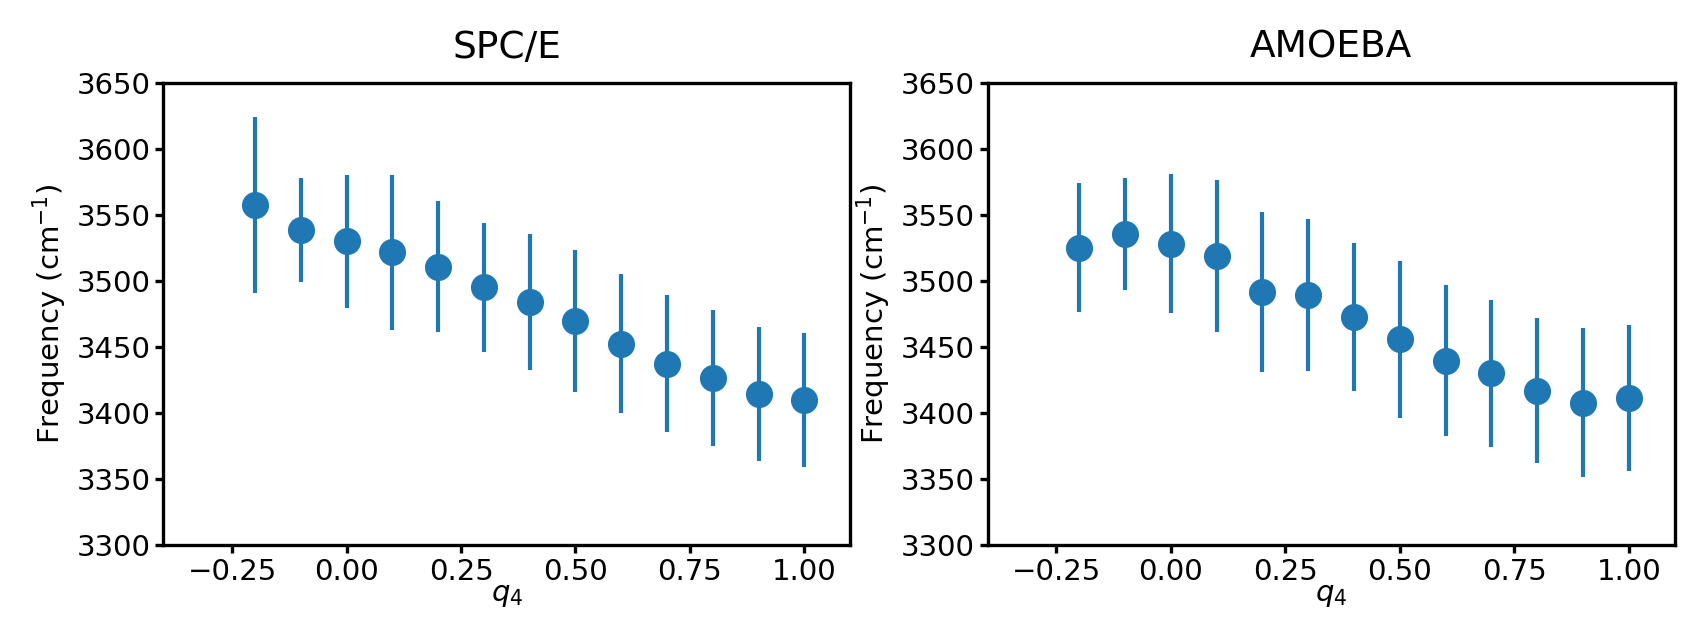

In [21]:
fs=9

fig, axs = plt.subplots(1, 2, figsize=[6.5, 2.0], dpi=300)

axs[0].scatter(q4s, avg_amoeba, c='C0', linewidth=lw, alpha=1.0)
axs[0].errorbar(q4s, avg_amoeba, yerr = std_amoeba, linewidth=0, elinewidth=1.0)
axs[1].scatter(q4s, avg_spce, c='C0', linewidth=lw, alpha=1.0)
axs[1].errorbar(q4s, avg_spce, yerr = std_spce, linewidth=0, elinewidth=1.0)


xlim = [-0.4, 1.1]
ylim = [3300, 3650]
ylabel = 'Frequency (cm$^{-1}$)'
xlabel = '$q_4$'

for i in range(2):
    axs[i].set_xlabel(xlabel, fontsize=fs-2, labelpad = -1)
    axs[i].set_ylabel(ylabel, fontsize=fs-2, labelpad = 2)
    axs[i].set_xlim(xlim[0], xlim[1])
    axs[i].set_ylim(ylim[0], ylim[1])
    axs[i].tick_params(size=2, labelsize=fs-2, pad=1)





axs[0].set_title('SPC/E', fontsize=fs)
axs[1].set_title('AMOEBA', fontsize=fs)





(array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   3.,
           2.,   4.,   1.,   4.,   8.,   3.,   2.,   0.,   1.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   2.,
           4.,   2.,   5.,   9.,  11.,   8.,   4.,   2.,   1.],
        [  0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   3.,   5.,
           5.,  13.,  18.,   8.,  14.,   6.,   7.,   6.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   3.,   1.,   2.,  12.,   8.,
          13.,  12.,  20.,  18.,  13.,  13.,   6.,   2.,   2.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   3.,   3.,   6.,  10.,  12.,
          15.,  14.,  26.,  17.,  15.,   9.,   5.,   1.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   1.,   0.,   4.,   4.,   9.,  25.,
          22.,  41.,  29.,  31.,  27.,  17.,   8.,   3.,   0.],
        [  0.,   0.,   1.,   0.,   0.,   1.,   4.,   4.,  12.,  11.,  23.,
          53.,  47.,  38.,  42.,  29.,  19.,  10.,   4.,   2.],
        [  0.,   0.,   0., 

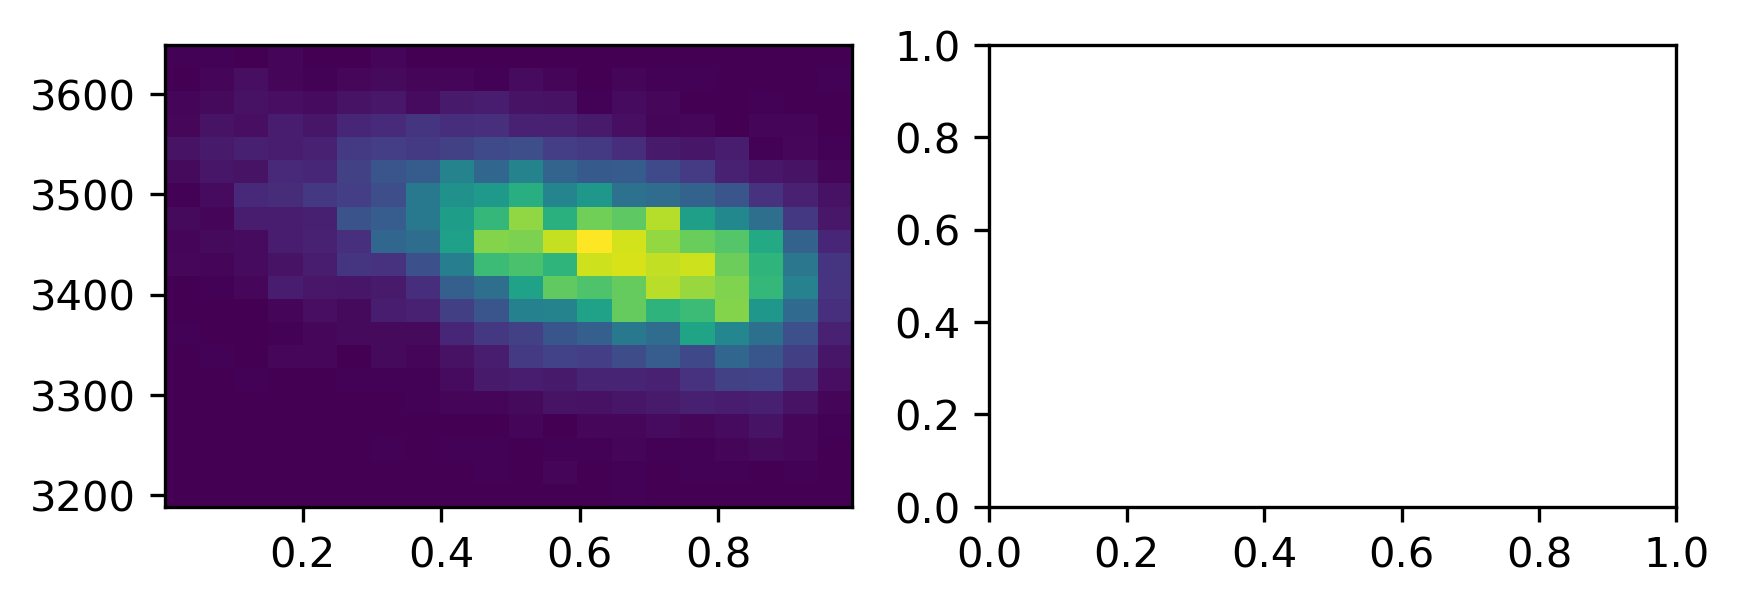

In [22]:
fig, axs = plt.subplots(1, 2, figsize=[6.5, 2.0], dpi=300)

dist1, dist2 = spce_q4_correlation

cut = dist1 > 0.0
dist1 = dist1[cut]
dist2 = dist2[cut]

axs[0].hist2d(dist1, dist2, bins = 20)



In [24]:
spce_A2 = np.load("spce2A.npy")
spce_A2param = np.load("spce2A_param.npy")


amoeba_A2 = np.load("amoeba2A.npy")
amoeba_A2param = np.load("amoeba2A_param.npy")

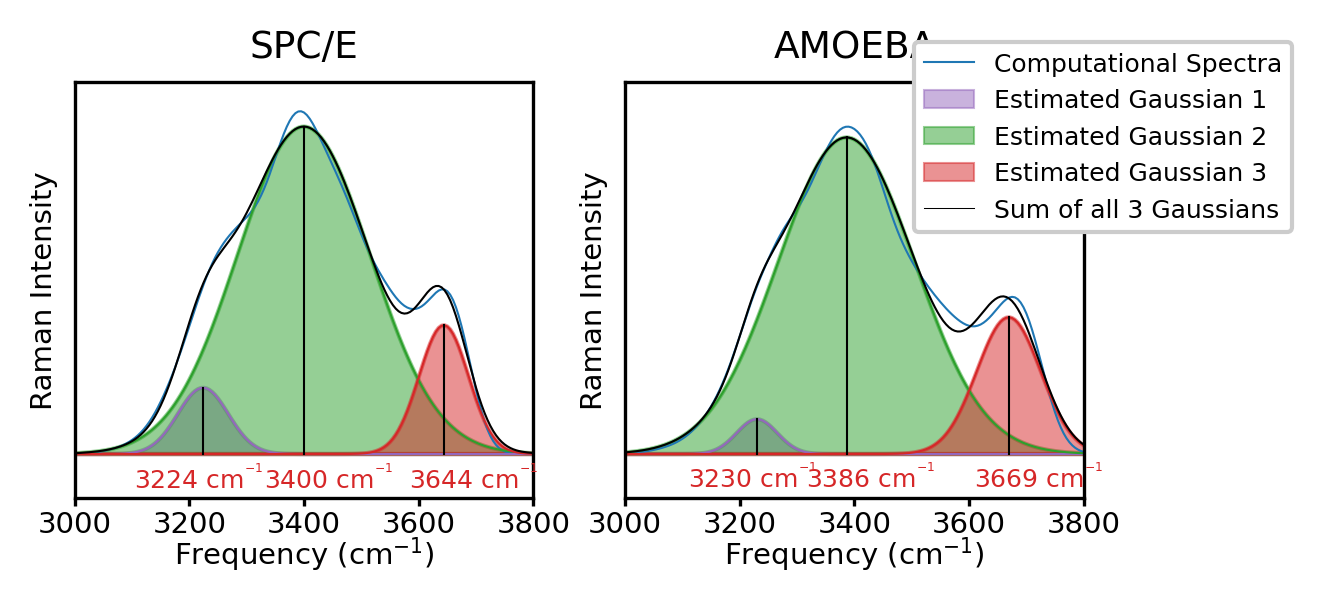

In [33]:
fig, axs = plt.subplots(1, 2, figsize=[4.34, 1.8], dpi=300)

axs[0].set_title('SPC/E', fontsize=fs)
axs[1].set_title('AMOEBA', fontsize=fs)

#plot 1
axs[0].plot(spce_A2[0], spce_A2[1], c='C0', linewidth=lw)

xx = spce_shift_sc[0]
alterparam = np.copy(spce_A2param)
alterparam[1:3] = 0
yy = curve(xx, *alterparam)
axs[0].plot(xx, yy, c='C4', linewidth=lw)
axs[0].fill_between(xx, yy, 0, color='C4', alpha = 0.5)
yy2 = np.copy(yy)

alterparam = np.copy(spce_A2param)
alterparam[[0, 2]] = 0
yy = curve(xx, *alterparam)
yy1 = np.copy(yy)
axs[0].plot(xx, yy, c='C2', linewidth=lw)
axs[0].fill_between(xx, yy, 0, color='C2', alpha = 0.5)


alterparam = np.copy(spce_A2param)
alterparam[:2] = 0
yy = curve(xx, *alterparam)
axs[0].plot(xx, yy, c='C3', linewidth=lw)
axs[0].fill_between(xx, yy, 0, color='C3', alpha = 0.5)

axs[0].plot(xx, yy1 + yy2 + yy, c='black', linewidth=lw)


axs[0].plot([spce_A2param[4]]*2, [0, np.max(yy1)], c='black', linewidth=lw)
axs[0].plot([spce_A2param[5]]*2, [0, np.max(yy)], c='black', linewidth=lw)
axs[0].plot([spce_A2param[3]]*2, [0, np.max(yy2)], c='black', linewidth=lw)

axs[0].text(spce_A2param[3]-120, -np.max(spce_A2[1])/10,
            str(int(np.round(spce_A2param[3], 0))) + ' cm$^{^{-1}}$', fontsize=fs-3, c='tab:red')
axs[0].text(spce_A2param[4]-70, -np.max(spce_A2[1])/10,
            str(int(np.round(spce_A2param[4], 0))) + ' cm$^{^{-1}}$', fontsize=fs-3, c='tab:red')
axs[0].text(spce_A2param[5]-60, -np.max(spce_A2[1])/10,
            str(int(np.round(spce_A2param[5], 0))) + ' cm$^{^{-1}}$', fontsize=fs-3, c='tab:red')

#plot 2
axs[1].plot(amoeba_A2[0], amoeba_A2[1], c='C0', linewidth=lw)

xx = amoeba_shift_sc[0]
alterparam = np.copy(amoeba_A2param)
alterparam[1:3] = 0
yy = curve(xx, *alterparam)
axs[1].plot(xx, yy, c='C4', linewidth=lw)
axs[1].fill_between(xx, yy, 0, color='C4', alpha = 0.5)
yy2 = np.copy(yy)

alterparam = np.copy(amoeba_A2param)
alterparam[[0, 2]] = 0
yy = curve(xx, *alterparam)
yy1 = np.copy(yy)
axs[1].plot(xx, yy, c='C2', linewidth=lw)
axs[1].fill_between(xx, yy, 0, color='C2', alpha = 0.5)


alterparam = np.copy(amoeba_A2param)
alterparam[:2] = 0
yy = curve(xx, *alterparam)
axs[1].plot(xx, yy, c='C3', linewidth=lw)
axs[1].fill_between(xx, yy, 0, color='C3', alpha = 0.5)

axs[1].plot(xx, yy1 + yy2 + yy, c='black', linewidth=lw)


axs[1].plot([amoeba_A2param[4]]*2, [0, np.max(yy1)], c='black', linewidth=lw)
axs[1].plot([amoeba_A2param[5]]*2, [0, np.max(yy)], c='black', linewidth=lw)
axs[1].plot([amoeba_A2param[3]]*2, [0, np.max(yy2)], c='black', linewidth=lw)

axs[1].text(amoeba_A2param[3]-120, -np.max(amoeba_A2[1])/10,
            str(int(np.round(amoeba_A2param[3], 0))) + ' cm$^{^{-1}}$', fontsize=fs-3, c='tab:red')
axs[1].text(amoeba_A2param[4]-70, -np.max(amoeba_A2[1])/10,
            str(int(np.round(amoeba_A2param[4], 0))) + ' cm$^{^{-1}}$', fontsize=fs-3, c='tab:red')
axs[1].text(amoeba_A2param[5]-60, -np.max(amoeba_A2[1])/10,
            str(int(np.round(amoeba_A2param[5], 0))) + ' cm$^{^{-1}}$', fontsize=fs-3, c='tab:red')

xlim = [3000, 3800]
ylims =  [[-0.0019, 0.016], [-0.0019, 0.016]]

#ylim = [3150, 3700]
ylabel = "Raman Intensity"
xlabel = 'Frequency (cm$^{-1}$)'

for i in range(2):
    axs[i].set_xlabel(xlabel, fontsize=fs-2, labelpad = -1)
    axs[i].set_ylabel(ylabel, fontsize=fs-2, labelpad = 2)
    axs[i].set_xlim(xlim[0], xlim[1])
    axs[i].set_ylim(ylims[i][0], ylims[i][1])


    axs[i].set_yticks([])


    #axs[i].set_ylim(ylim[0], ylim[1])
    axs[i].tick_params(size=2, labelsize=fs-2, pad=1)
    
    
    
    
    
axs[1].plot(point1, point2, c='C0',  alpha=1.0, linewidth=lw, label='Computational Spectra')
axs[1].fill_between(point1, point2, color='C4',  alpha=0.5, linewidth=lw, label='Estimated Gaussian 1')
axs[1].fill_between(point1, point2, color='C2',  alpha=0.5, linewidth=lw, label='Estimated Gaussian 2')
axs[1].fill_between(point1, point2, color='C3',  alpha=0.5, linewidth=lw, label='Estimated Gaussian 3')
axs[1].plot(point1, point2, c='black',  alpha=1.0, linewidth=lw/2, label='Sum of all 3 Gaussians')
axs[1].legend(fontsize=fs-3, loc=[0.63, 0.64], framealpha=1)

In [26]:
#separate = np.load("../../quantum/clean_model_construction/results/separate.npy")
#amoeba_separate = np.load("../../quantum/clean_model_construction/results/amoeba_separate.npy")



In [27]:
#import matplotlib as mpl
#lw = 0.8
#n_lines = 21

#colors = ['C0', 'C1', 'C2']
#print(colors)

#fig, axs = plt.subplots(1, 2, figsize=[4.34, 1.8], dpi=300)


#for i in range(3):
#    axs[0].plot(separate[0], separate[i+1], c=colors[i], linewidth=lw)


#for i in range(3):
#    axs[1].plot(amoeba_separate[0], amoeba_separate[i+1], c=colors[i], linewidth=lw)



#xlim = [3000, 3800]
#ylims =  [[-0.0019, 0.016], [-0.0019, 0.016]]

#ylim = [3150, 3700]
#ylabel = "Raman Intensity"
#xlabel = 'Frequency (cm$^{-1}$)'

#for i in range(2):
#    axs[i].set_xlabel(xlabel, fontsize=fs-2, labelpad = -1)
#    axs[i].set_ylabel(ylabel, fontsize=fs-2, labelpad = 2)
#    axs[i].set_xlim(xlim[0], xlim[1])
#    axs[i].set_ylim(ylims[i][0], ylims[i][1])


#    axs[i].set_yticks([])


    #axs[i].set_ylim(ylim[0], ylim[1])
#    axs[i].tick_params(size=2, labelsize=fs-2, pad=1)


#axs[0].text(0.02, 0.92, "1st Block",c=colors[0],fontsize=fs-1,
#              transform = axs[0].transAxes)
#axs[0].text(0.02, 0.82, "2nd block",c=colors[1],fontsize=fs-1,
#              transform = axs[0].transAxes) 
#axs[0].text(0.02, 0.72, "3rd block",c=colors[2],fontsize=fs-1,
#              transform = axs[0].transAxes)

#axs[1].text(0.02, 0.92, "1st Block",c=colors[0],fontsize=fs-1,
#              transform = axs[1].transAxes)
#axs[1].text(0.02, 0.82, "2nd block",c=colors[1],fontsize=fs-1,
#              transform = axs[1].transAxes) 
#axs[1].text(0.02, 0.72, "3rd block",c=colors[2],fontsize=fs-1,
#              transform = axs[1].transAxes)

#axs[0].set_title('SPC/E', fontsize=fs)
#axs[1].set_title('AMOEBA', fontsize=fs)

In [34]:
amoeba_param = np.load("amoeba_param.npy")
arrH2O = np.load("../ramans/H2O_Raman.npy")





Text(0.02, 0.92, 'Experiment')

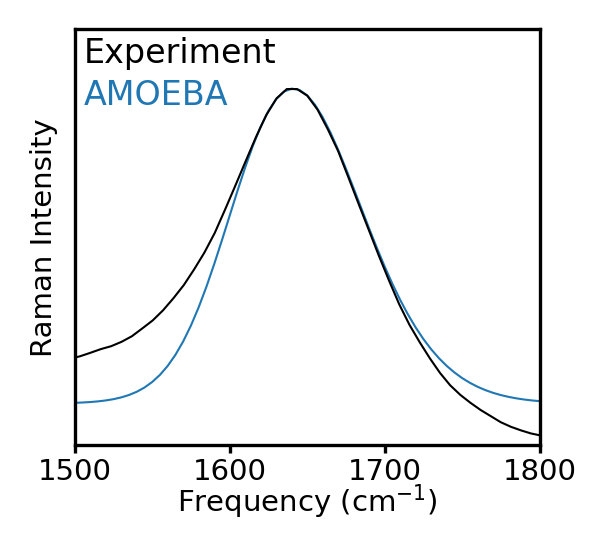

In [35]:
fig, ax = plt.subplots(1, 1, figsize=[2.0, 1.8], dpi=300)



ax.plot(amoeba_param[0], amoeba_param[1], linewidth = 0.5)
ax.plot(arrH2O[:,0], (arrH2O[:,7] - 1.2e-5)*2.05e2, c='black', linewidth=0.5)



ax.set_xlabel(xlabel, fontsize=fs-2, labelpad = -1)
ax.set_ylabel(ylabel, fontsize=fs-2, labelpad = 2)
ax.set_xlim(plt.xlim(1500, 1800))
ax.set_ylim(-0.0005, 0.0045)
ax.tick_params(size=2, labelsize=fs-2, pad=1)
ax.set_yticks([])

ax.text(0.02, 0.82, "AMOEBA", c = 'C0', fontsize=fs-1,
              transform = ax.transAxes)

ax.text(0.02, 0.92, "Experiment", c="black",fontsize=fs-1,
              transform = ax.transAxes) 
#axs[i].set_ylim(ylim[0], ylim[1])
